---
# Hierarchical Clustering - Model 2
---
In this notebook, ...


## Results

---

### Importing necessary library

In [225]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA

from sklearn.cluster import KMeans

from yellowbrick.cluster import KElbowVisualizer
import scipy.cluster.hierarchy as sch

from sklearn.cluster import AgglomerativeClustering

from sklearn.metrics import silhouette_score

import joblib

### Read data file

**Read Cleaned + Feature Engineered File**

In [2]:
df = pd.read_excel('../data/AGRIBALYSE3.2_Synthese_cleaned_featEng.xlsx')
df

Season Code  Airplane Code  EF Score  Climate Change  \
0               2              0  1.874152        7.584518   
1               2              0  0.148315        0.940414   
2               2              0  0.147701        1.174072   
3               2              0  1.547348       11.786920   
4               2              0  1.547348       11.786920   
...           ...            ...       ...             ...   
2446            2              0  2.744841       29.685425   
2447            2              0  2.719832       29.389500   
2448            2              0  2.738488       29.350392   
2449            2              0  3.418940       36.767887   
2450            2              0  2.744841       29.685425   

      Ozone Layer Depletion  Ionizing Radiation  \
0              2.932471e-07           30.251469   
1              2.703735e-08            0.558035   
2              3.382798e-08            0.545093   
3              6.270593e-07           11.185511   
4              6.270593e-07           11.185511   
...                     ...                 ...   
2446           3.465597e-07            2.183183   
2447           3.360531e-07            1.988039   
2448           3.342279e-07            2.401715   
2449           4.171038e-07            2.867791   
2450           3.465597e-07            2.183183   

      Photochemical Ozone Formation  Fine Particles  \
0                          0.025011    4.738923e-07   
1                          0.003928    7.864125e-08   
2                          0.004025    6.420649e-08   
3                          0.051406    8.615935e-07   
4                          0.051406    8.615935e-07   
...                             ...             ...   
2446                       0.052400    2.364050e-06   
2447                       0.051666    2.357969e-06   
2448                       0.051710    2.361347e-06   
2449                       0.064661    2.950918e-06   
2450                       0.052400    2.364050e-06   

      Toxicological Effects (Non-carcinogenic)  \
0                                 2.087261e-07   
1                                 4.238290e-08   
2                                 2.658238e-08   
3                                 9.852629e-08   
4                                 9.852629e-08   
...                                        ...   
2446                              3.273358e-07   
2447                              3.246593e-07   
2448                              3.275382e-07   
2449                              4.093391e-07   
2450                              3.273358e-07   

      Toxicological Effects (Carcinogenic)  ...  Delivery_Ambiant (long)  \
0                             6.622400e-09  ...                        1   
1                             8.815249e-10  ...                        1   
2                             2.141891e-09  ...                        1   
3                             6.933245e-09  ...                        1   
4                             6.933245e-09  ...                        1   
...                                    ...  ...                      ...   
2446                          1.520520e-08  ...                        0   
2447                          1.515039e-08  ...                        0   
2448                          1.515673e-08  ...                        0   
2449                          1.894341e-08  ...                        0   
2450                          1.520520e-08  ...                        0   

      Delivery_Ambiant (moyen)  Delivery_Congelé  Delivery_Glacé  \
0                            0                 0               0   
1                            0                 0               0   
2                            0                 0               0   
3                            0                 0               0   
4                            0                 0               0   
...                        ...               ...             ... 

**Read Cleaned File**

In [3]:
df_o = pd.read_excel('../data/AGRIBALYSE3.2_Synthese_cleaned.xlsx')
df_o

Food Group    Food Sub-group  \
0     aides culinaires et ingrédients divers  aides culinaires   
1     aides culinaires et ingrédients divers  aides culinaires   
2     aides culinaires et ingrédients divers  aides culinaires   
3     aides culinaires et ingrédients divers            algues   
4     aides culinaires et ingrédients divers            algues   
...                                      ...               ...   
2446                 viandes, œufs, poissons    viandes cuites   
2447                 viandes, œufs, poissons    viandes cuites   
2448                 viandes, œufs, poissons    viandes cuites   
2449                 viandes, œufs, poissons    viandes cuites   
2450                 viandes, œufs, poissons    viandes cuites   

                                               LCI Name  Season Code  \
0             Aromatic stock cube, for fish, dehydrated            2   
1                               Topping sauce for pizza            2   
2                               Soy "cream" preparation            2   
3                                    Seaweed, agar, raw            2   
4     Sea lettuce (Enteromorpha sp.), dried or dehyd...            2   
...                                                 ...          ...   
2446          Veal, knuckle or shank, braised or boiled            2   
2447                Veal, tenderloin, grilled/pan-fried            2   
2448                          Veal, tenderloin, roasted            2   
2449                                Veal, roast, cooked            2   
2450                 Calf, head, boiled/cooked in water            2   

      Airplane Code        Delivery   Packaging         Preparation  EF Score  \
0                 0  Ambiant (long)  PACK PROXY  Pas de préparation  1.874152   
1                 0  Ambiant (long)  PACK PROXY  Pas de préparation  0.148315   
2                 0  Ambiant (long)  PACK PROXY  Pas de préparation  0.147701   
3                 0  Ambiant (long)  PACK PROXY  Pas de préparation  1.547348   
4                 0  Ambiant (long)  PACK PROXY  Pas de préparation  1.547348   
...             ...             ...         ...                 ...       ...   
2446              0           Glacé    PACK AGB     Cuisson à l'eau  2.744841   
2447              0           Glacé    PACK AGB               Poêle  2.719832   
2448              0           Glacé    PACK AGB                Four  2.738488   
2449              0           Glacé    PACK AGB                Four  3.418940   
2450              0           Glacé    PACK AGB     Cuisson à l'eau  2.744841   

      Climate Change  ...  Marine Eutrophication  Terrestrial Eutrophication  \
0           7.584518  ...               0.026783                    0.137099   
1           0.940414  ...               0.004162                    0.030263   
2           1.174072  ...               0.007233                    0.024434   
3          11.786920  ...               0.015034                    0.143648   
4          11.786920  ...               0.015034                    0.143648   
...              ...  ...                    ...                         ...   
2446       29.685425  ...               0.091173                    1.457487   
2447       29.389500  ...               0.091187                    1.457302   
2448       29.350392  ...               0.091077                    1.457291   
2449       36.767887  ...               0.113935                    1.821645   
2450       29.685425  ...               0.091173                    1.457487   

      Ecotoxicity for Freshwater Aquatic Ecosystems     Land Use  \
0                                         70.183757   106.309500   
1                                         11.027442    67.673943   
2                                         30.835753   116.492280   
3                                         57.867520    26.718351   
4                                         57.867520    26.718351   
...                               

---

<center>
    
## Preparing data

</center>

---

### Separate X and y features

In [139]:
# Seperate X and y features
X = df.drop(columns=['EF Score','Climate Change'])
y = df['EF Score']

# Columns to keep for subset X
cols=[ 
       #'Ozone Layer Depletion',
       #'Ionizing Radiation',
       'Photochemical Ozone Formation', 
       'Fine Particles',
       'Toxicological Effects (Non-carcinogenic)',
       'Toxicological Effects (Carcinogenic)',
       #'Terrestrial and Freshwater Acidification', 
       'Freshwater Eutrophication',
       'Marine Eutrophication', 
       #'Terrestrial Eutrophication',
       'Ecotoxicity for Freshwater Aquatic Ecosystems',
       'Land Use',
       'Water Resource Depletion', 
       'Energy Resource Depletion',
       'Mineral Resource Depletion',
       'Climate Change'
       #'Climate Change - Biogenic Emissions',
       #'Climate Change - Fossil Emissions',
       #'Climate Change - Emissions from Land Use Change'
     ]

# Creating a new column combining both Toxicological Effects
X_sub['Toxicological Effects'] = X_sub[['Toxicological Effects (Non-carcinogenic)', 'Toxicological Effects (Carcinogenic)']].sum(axis=1)

# Creating a new column combining both Eutrophication
X_sub['Water Eutrophication'] = X_sub[['Freshwater Eutrophication', 'Marine Eutrophication', ]].sum(axis=1)

# Removing unneccessary columns
X_sub = X_sub.drop(columns=['Toxicological Effects (Non-carcinogenic)',
                            'Toxicological Effects (Carcinogenic)',
                            'Freshwater Eutrophication',
                            'Marine Eutrophication'])

### Scale X features

In [140]:
# Create instance of scaler
scaler = StandardScaler()

# Scale the data
X_scaled = scaler.fit_transform(X)

# Scale X subset
X_sub_scaled = scaler.fit_transform(X_sub)

---

<center>
    
## Hierarchical Clustering

</center>

---

**Dendogram complete dataset**

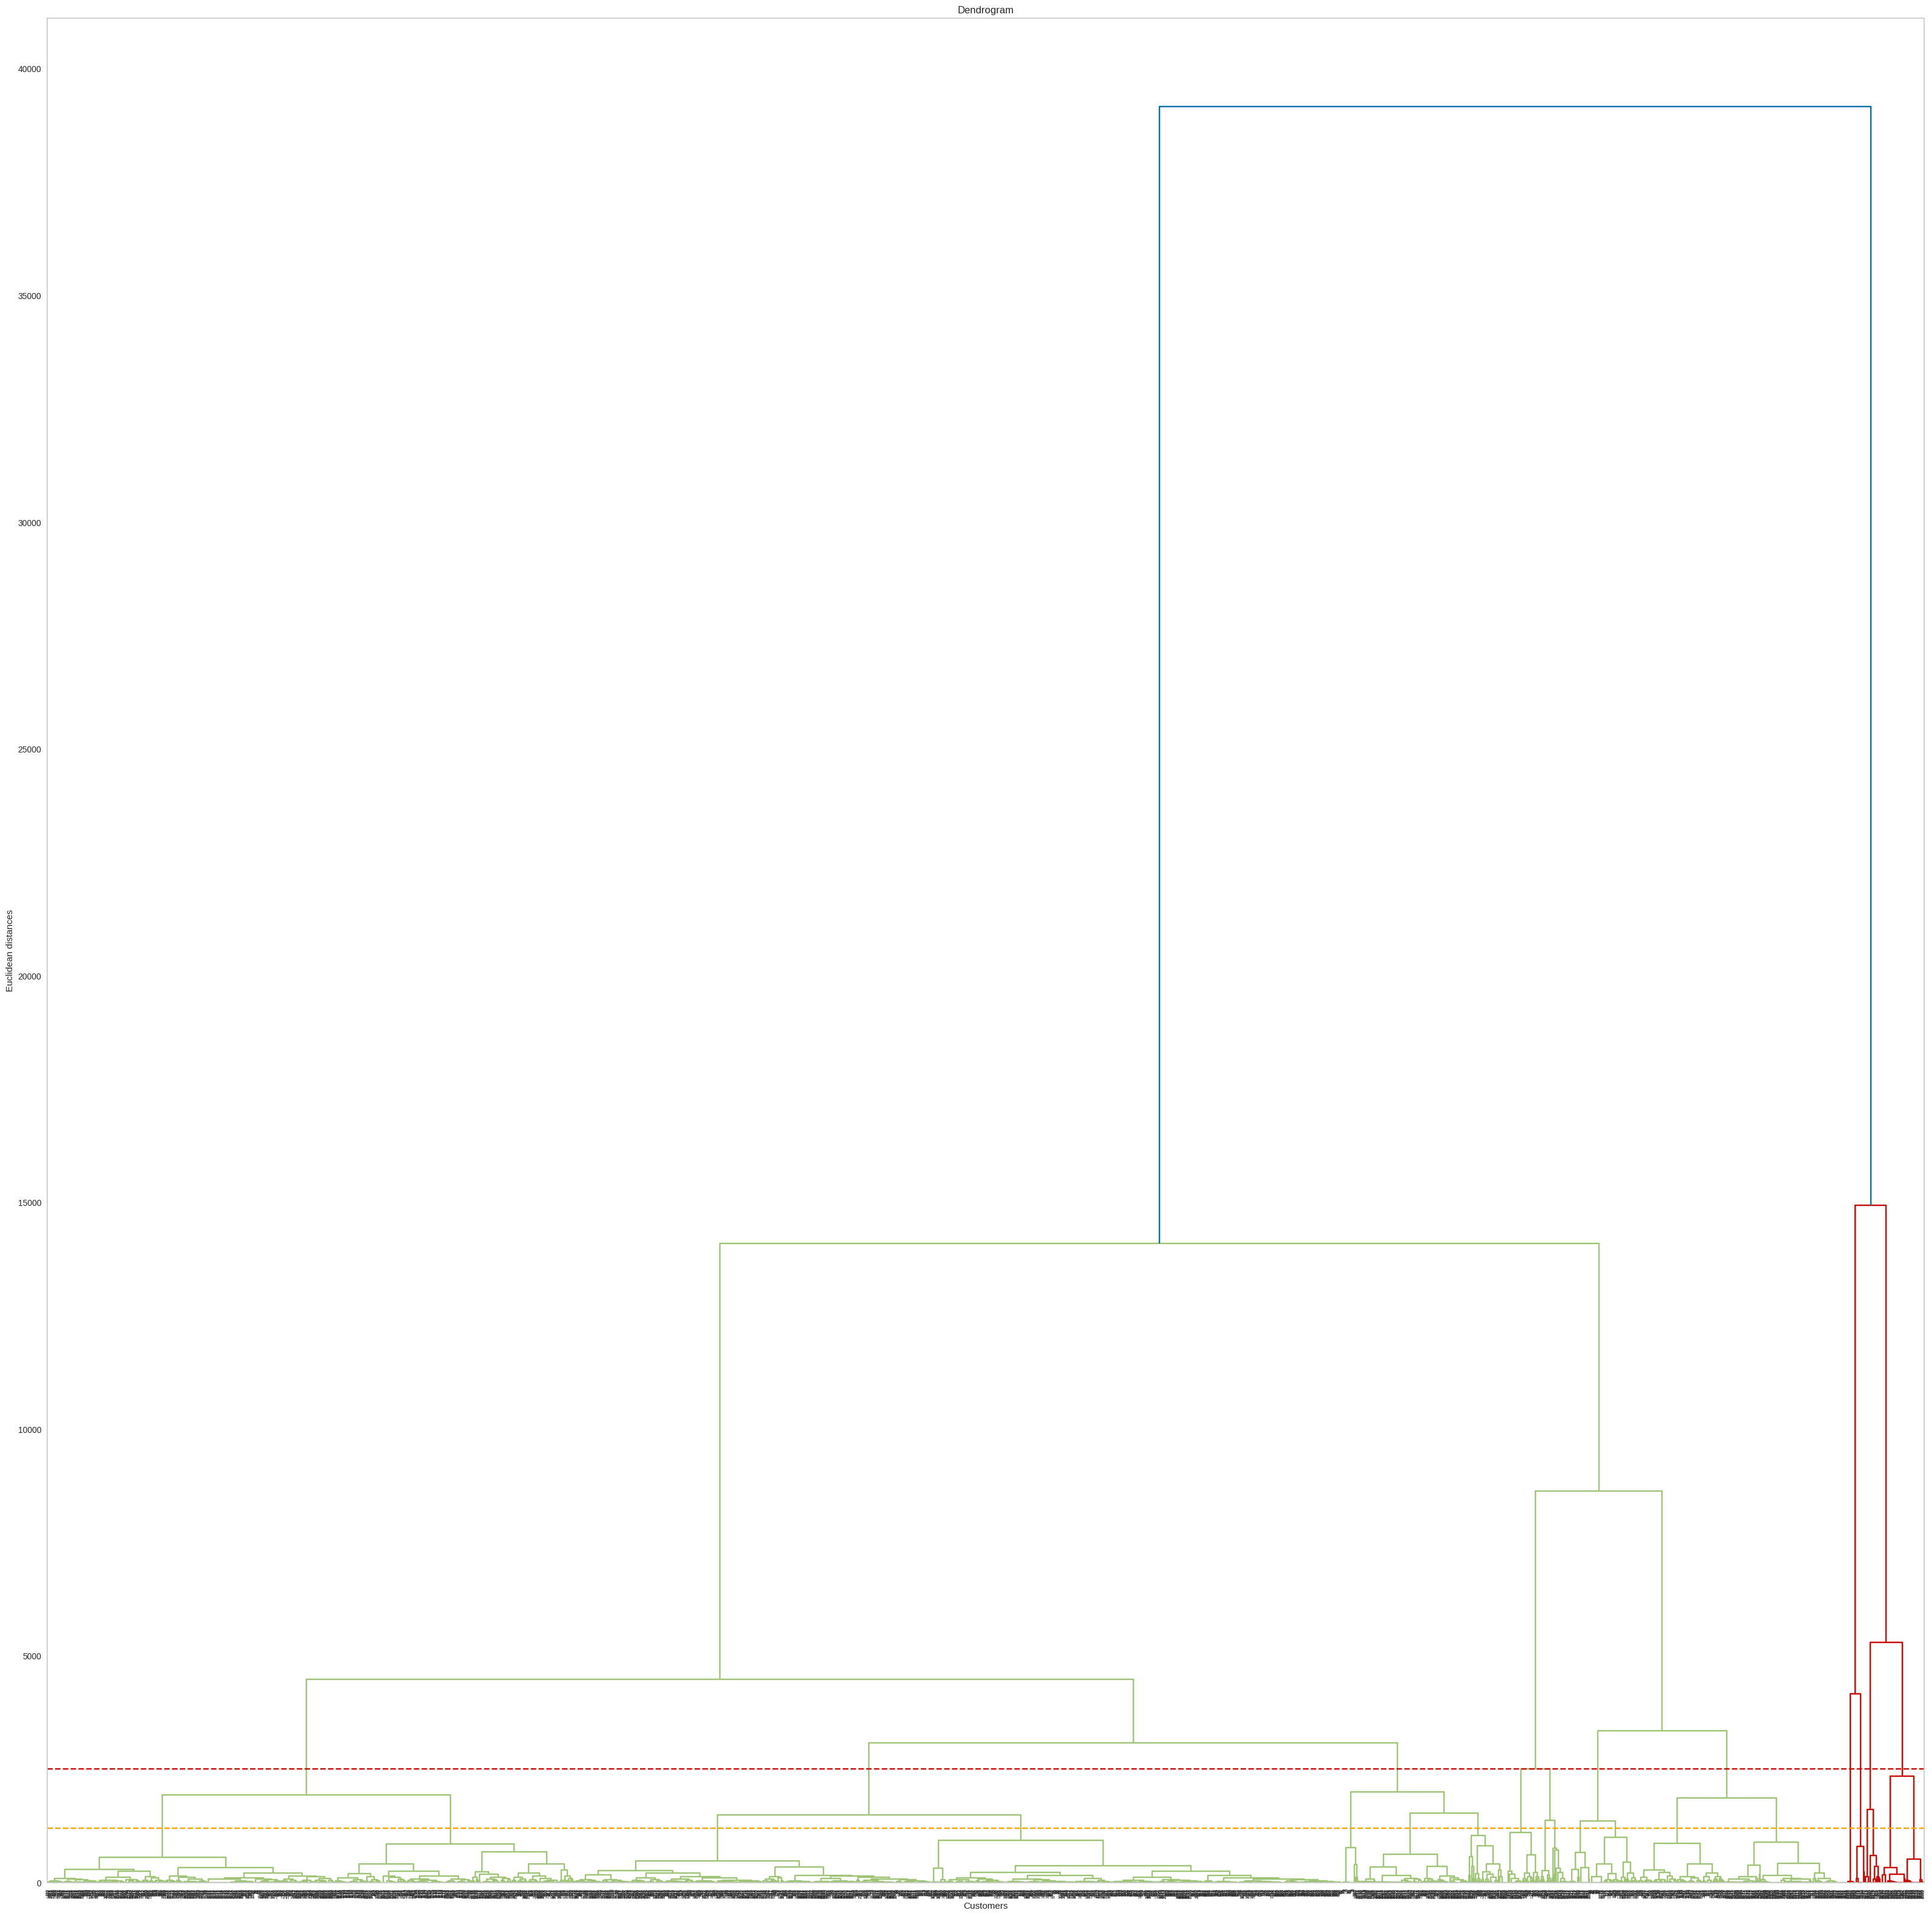

In [226]:
plt.figure(figsize=(40,40))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')

plt.grid(False)
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))

plt.axhline(y=2500, color='r', linestyle='--')
plt.axhline(y=1200, color='orange', linestyle='--')

plt.show()

In [232]:
sil = []

for cluster in range(2,100) :
    ac = AgglomerativeClustering(n_clusters= cluster, metric='euclidean', linkage='ward')
    sil.append(silhouette_score(X_scaled, ac.fit_predict(X_scaled)))

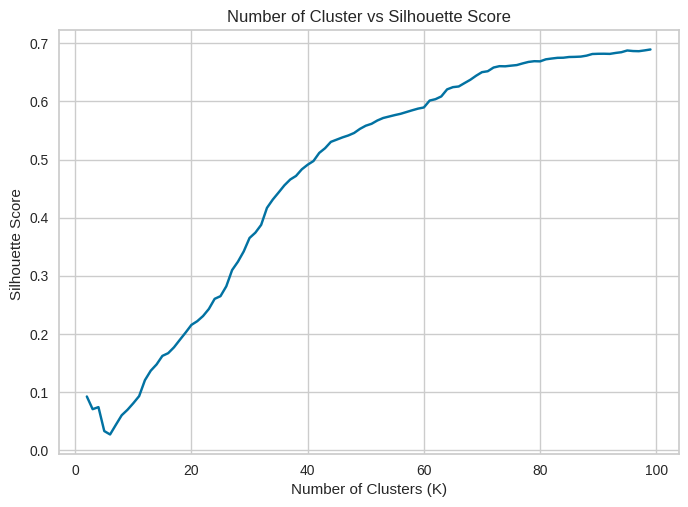

In [234]:
# Plot the elbow graph
plt.plot(range(2, 100), sil)
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score ')
plt.title('Number of Cluster vs Silhouette Score')
plt.show()

**Dendogram of data subset**

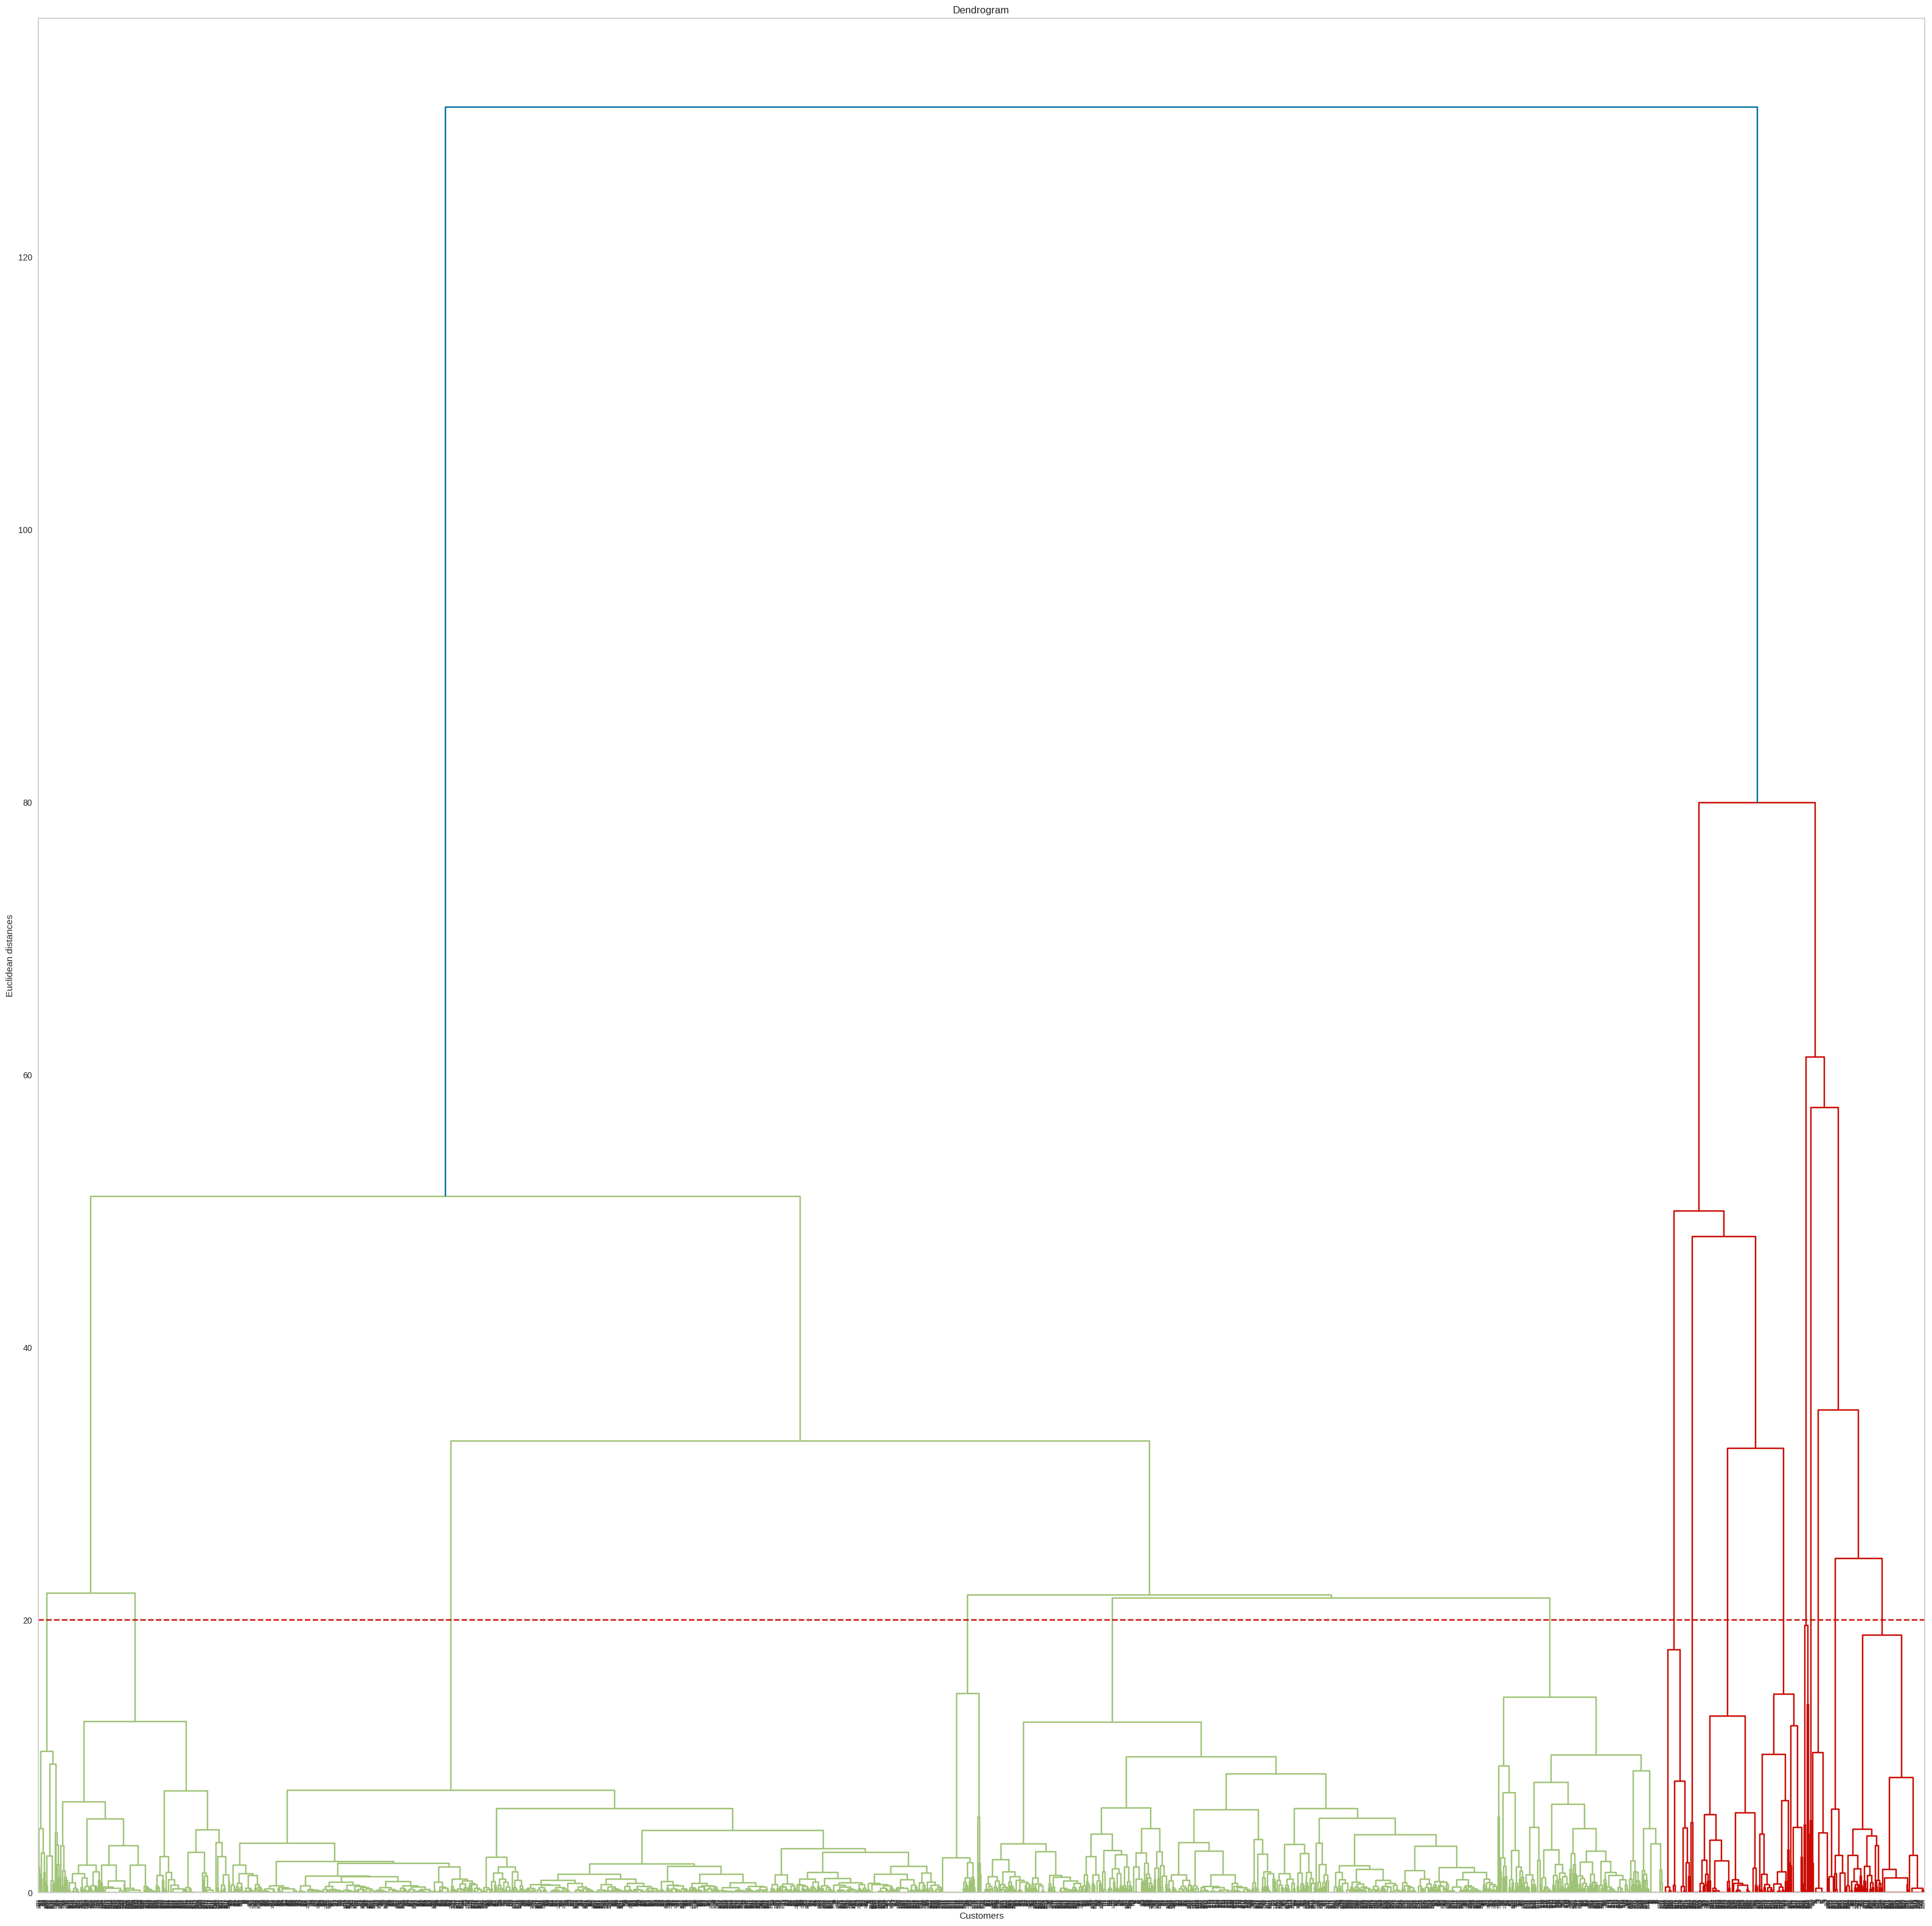

In [222]:
plt.figure(figsize=(40,40))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')

plt.grid(False)
dendrogram = sch.dendrogram(sch.linkage(X_sub_scaled, method = 'ward'))

plt.axhline(y=20, color='r', linestyle='--')
plt.show()

In [235]:
sil = []

for cluster in range(2,20) :
    ac = AgglomerativeClustering(n_clusters= cluster, metric='euclidean', linkage='ward')
    sil.append(silhouette_score(X_sub_scaled, ac.fit_predict(X_sub_scaled)))

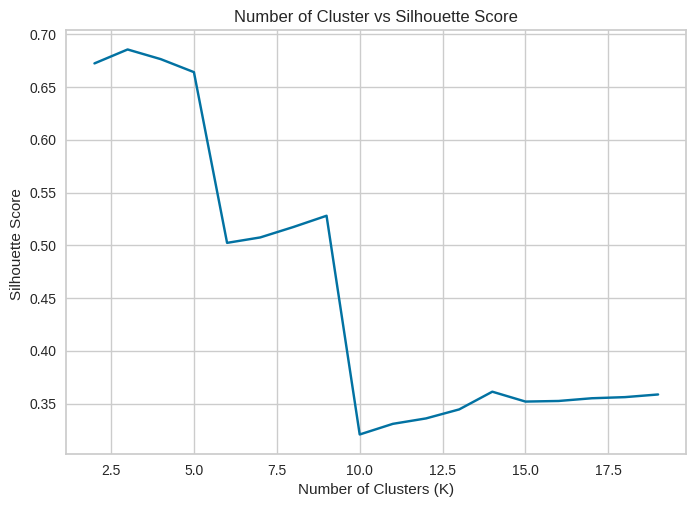

In [236]:
# Plot the elbow graph
plt.plot(range(2, 20), sil)
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score ')
plt.title('Number of Cluster vs Silhouette Score')
plt.show()

---

<center>
    
## Agglomerative Clustering Model

</center>

---

---
### Creating an Agglomerative Clustering model with 20 clusters

---

**Create intance of model**

In [237]:
ac = AgglomerativeClustering(n_clusters= 20, metric='euclidean', linkage='ward')

**Fit the model on the dataset**

In [238]:
ac.fit(X_scaled)

AgglomerativeClustering(n_clusters=20)

---
### Evaluate the value K=20 for number of cluster

---

**Add Cluster labels to the cleaned dataframe**

In [239]:
df_o['label'] = ac.labels_

df_o['label_str'] = ac.labels_.astype(str)

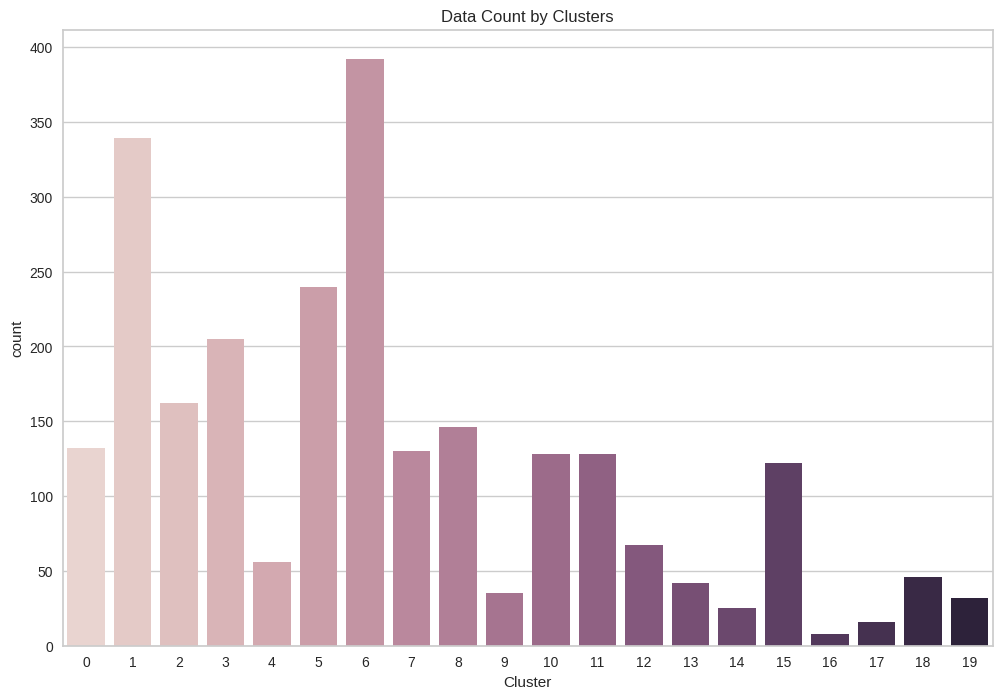

In [240]:
# Create figure and adjust size
plt.figure(figsize=(12,8))

# Create count plot
ax = sns.countplot(x=df_o['label'], hue=df_o['label'], legend=False)

# Add title
ax.set_title('Data Count by Clusters')

# Add axis labels
ax.set_xlabel('Cluster')

# Show plot
plt.show()

/tmp/ipykernel_3596703/83504249.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("gist_ncar", 60)
/tmp/ipykernel_3596703/83504249.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("gist_ncar", 60 * 5)  # Sample from a wider range
/tmp/ipykernel_3596703/83504249.py:15: UserWarning: The palette list has more values (60) than needed (20), which may not be intended.
  ax = sns.scatterplot(df_o, x=df_o.index, y='EF Score', hue='label_str', legend=True, palette=palette)


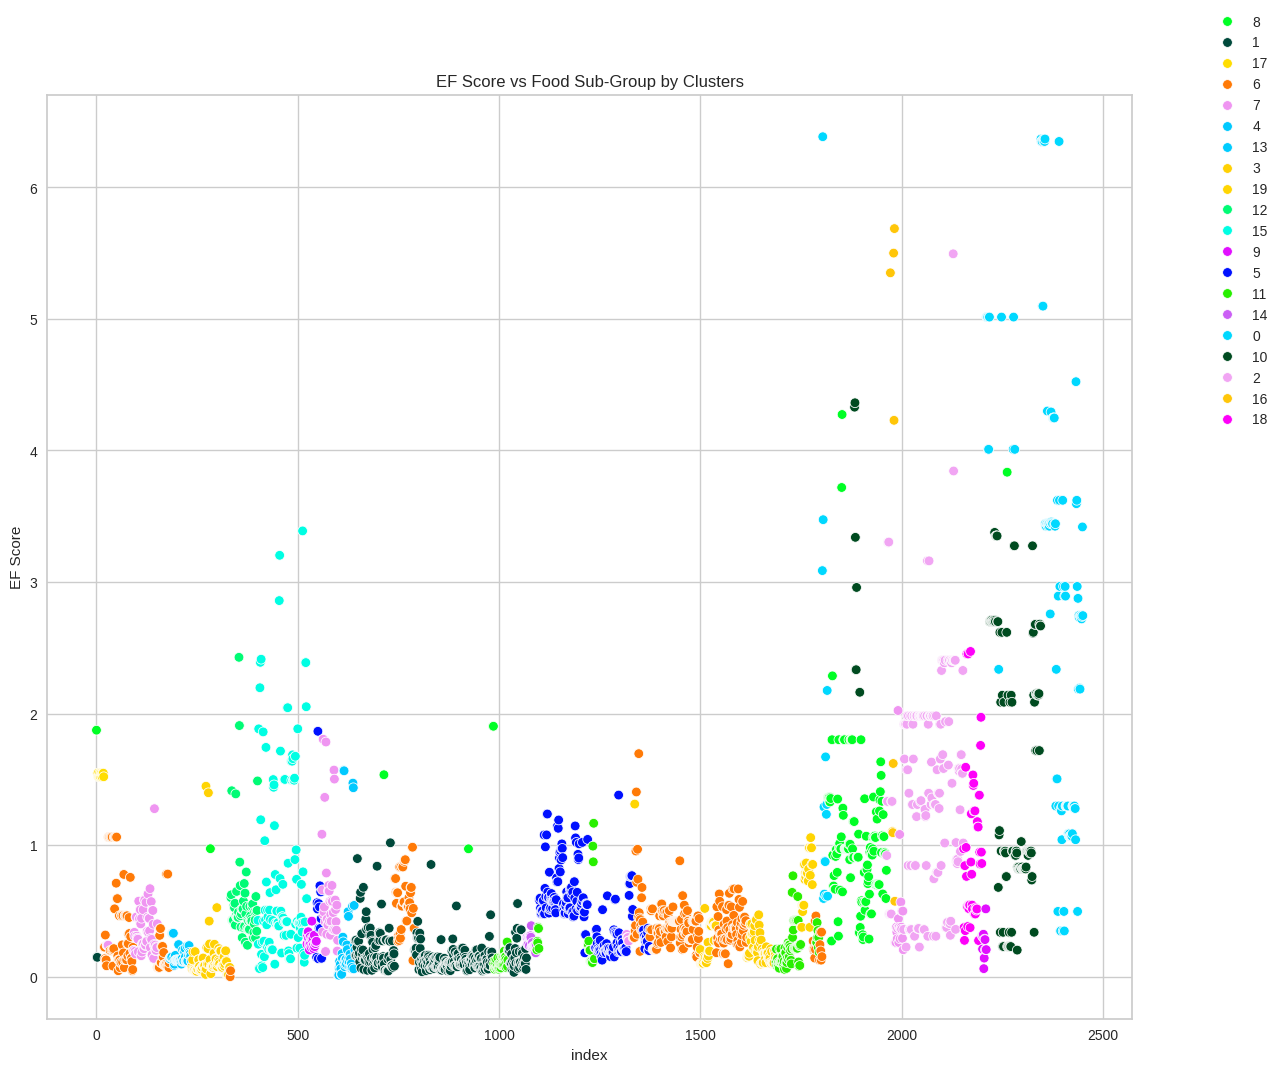

In [241]:
# Create figure and adjust size
plt.figure(figsize=(14,12))

cmap = plt.cm.get_cmap("gist_ncar", 60) 
palette = [cmap(i) for i in range(60)]

cmap = plt.cm.get_cmap("gist_ncar", 60 * 5)  # Sample from a wider range

# Select non-continuous indices to avoid smooth gradients
indices = np.random.choice(range(cmap.N), 60, replace=False) 
palette = [cmap(i) for i in indices]


# Create count plot
ax = sns.scatterplot(df_o, x=df_o.index, y='EF Score', hue='label_str', legend=True, palette=palette)

# Add title
ax.set_title(f'EF Score vs Food Sub-Group by Clusters')

# Add axis labels
ax.set_xlabel('index')
ax.set_ylabel('EF Score')

#
#ax.set_xticklabels(df_o['Food Sub-group'].unique(),rotation=90)

plt.legend(loc='upper center', bbox_to_anchor=(1.1, 1.1), ncol=1)

# Show plot
plt.show()


/tmp/ipykernel_3596703/316389407.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("gist_ncar", 60)
/tmp/ipykernel_3596703/316389407.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("gist_ncar", 60 * 5)  # Sample from a wider range
/tmp/ipykernel_3596703/316389407.py:16: UserWarning: The palette list has more values (60) than needed (20), which may not be intended.
  ax = sns.scatterplot(df_o, x='Food Sub-group', y='EF Score', hue='label_str', legend=True, palette=palette)
/tmp/ipykernel_3596703/316389407.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ti

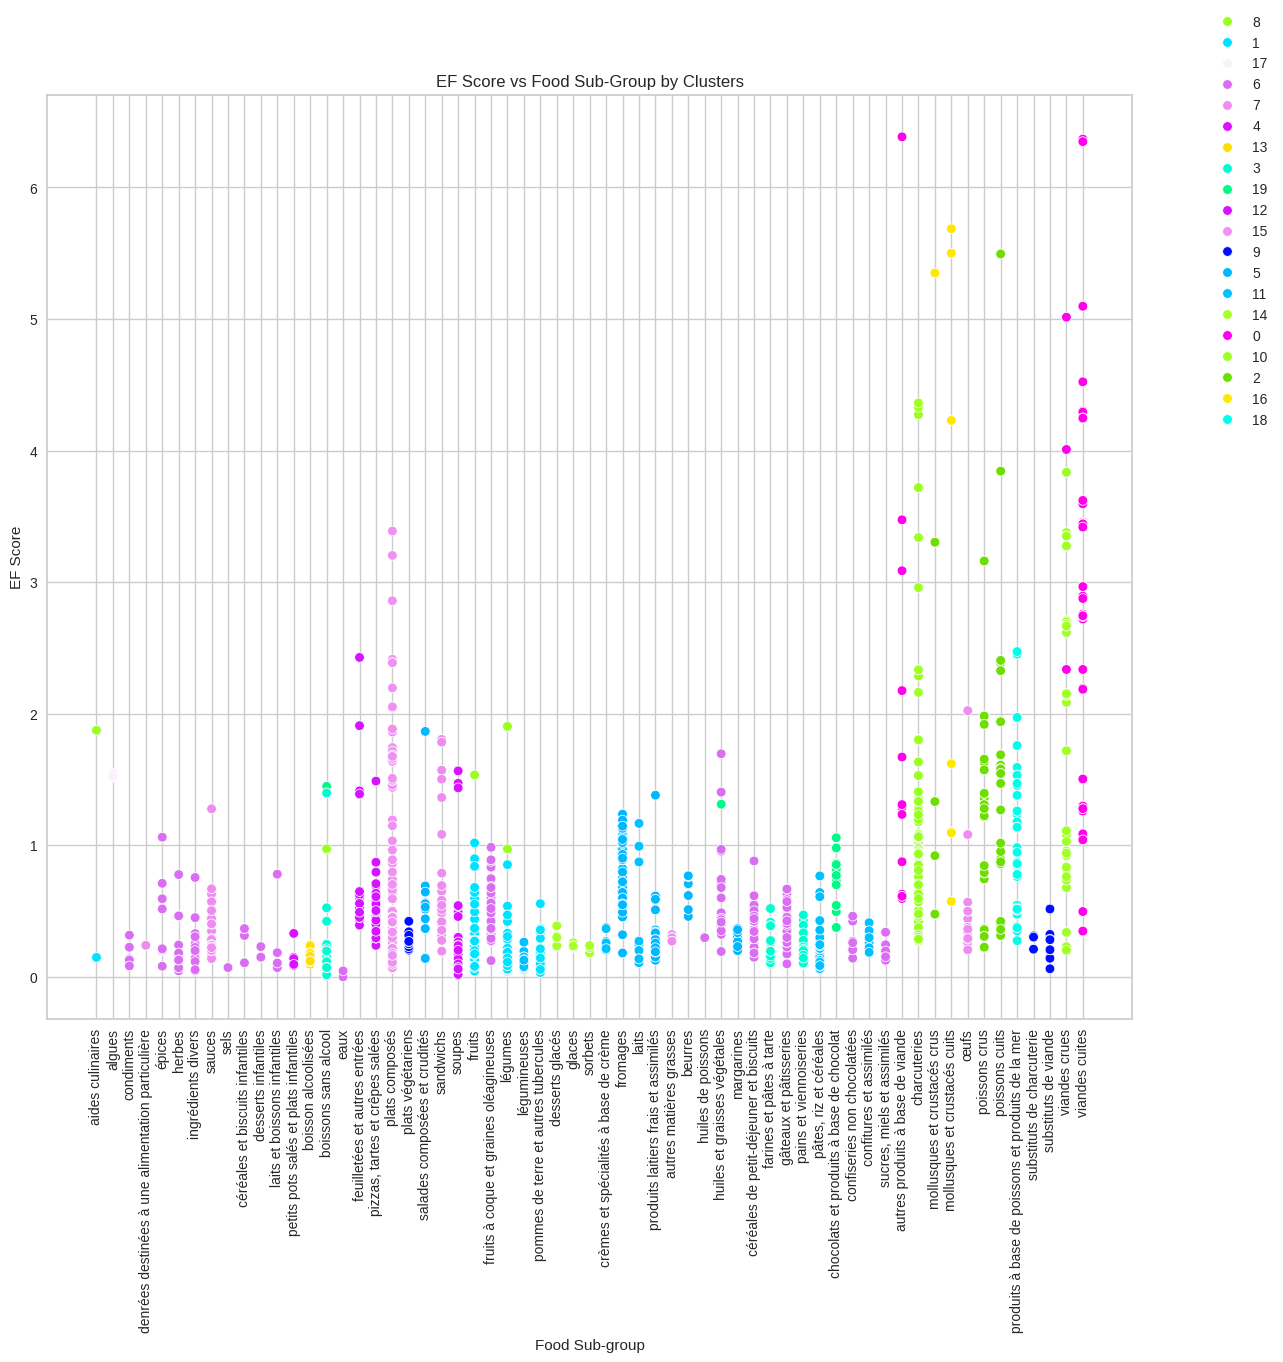

In [242]:
# Create figure and adjust size
plt.figure(figsize=(14,12))

cmap = plt.cm.get_cmap("gist_ncar", 60) 
palette = [cmap(i) for i in range(60)]


cmap = plt.cm.get_cmap("gist_ncar", 60 * 5)  # Sample from a wider range

# Select non-continuous indices to avoid smooth gradients
indices = np.random.choice(range(cmap.N), 60, replace=False) 
palette = [cmap(i) for i in indices]


# Create count plot
ax = sns.scatterplot(df_o, x='Food Sub-group', y='EF Score', hue='label_str', legend=True, palette=palette)

# Add title
ax.set_title(f'EF Score vs Food Sub-Group by Clusters')

# Add axis labels
ax.set_xlabel('Food Sub-group')
ax.set_ylabel('EF Score')

#
ax.set_xticklabels(df_o['Food Sub-group'].unique(),rotation=90)

plt.legend(loc='upper center', bbox_to_anchor=(1.1, 1.1), ncol=1)

# Show plot
plt.show()


---
### Creating an Agglomerative Clustering model with 60 clusters

---

**Create intance of model**

In [14]:
ac = AgglomerativeClustering(n_clusters= 60, metric='euclidean', linkage='ward')

**Fit the model on the dataset**

In [15]:
ac.fit(X_scaled)

AgglomerativeClustering(n_clusters=60)

---
### Evaluate the value K=60 for number of cluster

---

**Add Cluster labels to the cleaned dataframe**

In [243]:
df_o['label'] = ac.labels_

df_o['label_str'] = ac.labels_.astype(str)

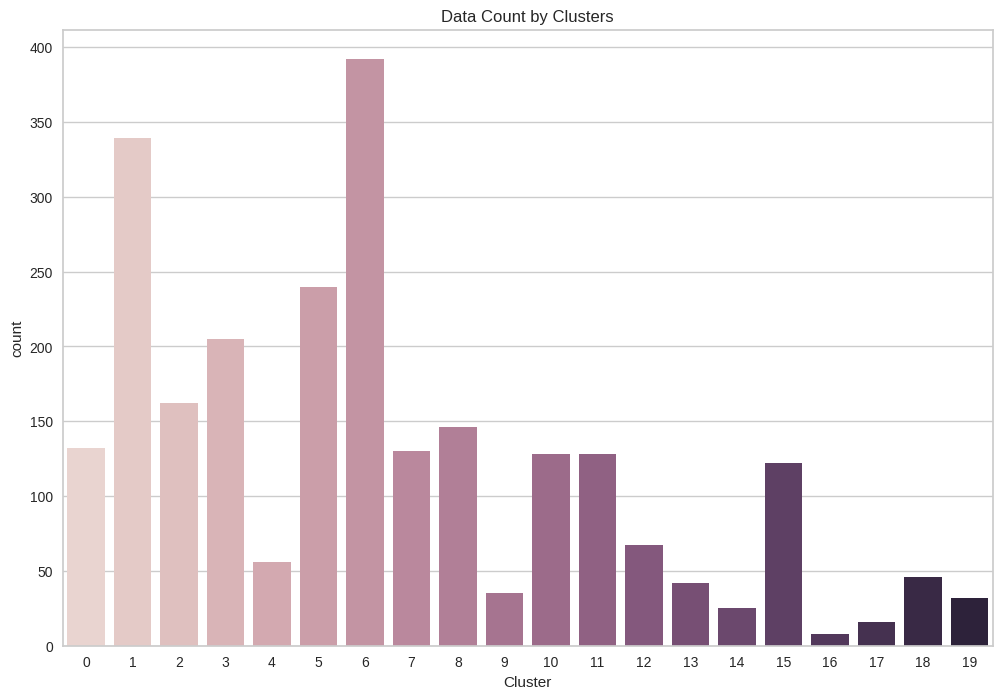

In [244]:
# Create figure and adjust size
plt.figure(figsize=(12,8))

# Create count plot
ax = sns.countplot(x=df_o['label'], hue=df_o['label'], legend=False)

# Add title
ax.set_title('Data Count by Clusters')

# Add axis labels
ax.set_xlabel('Cluster')

# Show plot
plt.show()

/tmp/ipykernel_3596703/83504249.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("gist_ncar", 60)
/tmp/ipykernel_3596703/83504249.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("gist_ncar", 60 * 5)  # Sample from a wider range
/tmp/ipykernel_3596703/83504249.py:15: UserWarning: The palette list has more values (60) than needed (20), which may not be intended.
  ax = sns.scatterplot(df_o, x=df_o.index, y='EF Score', hue='label_str', legend=True, palette=palette)


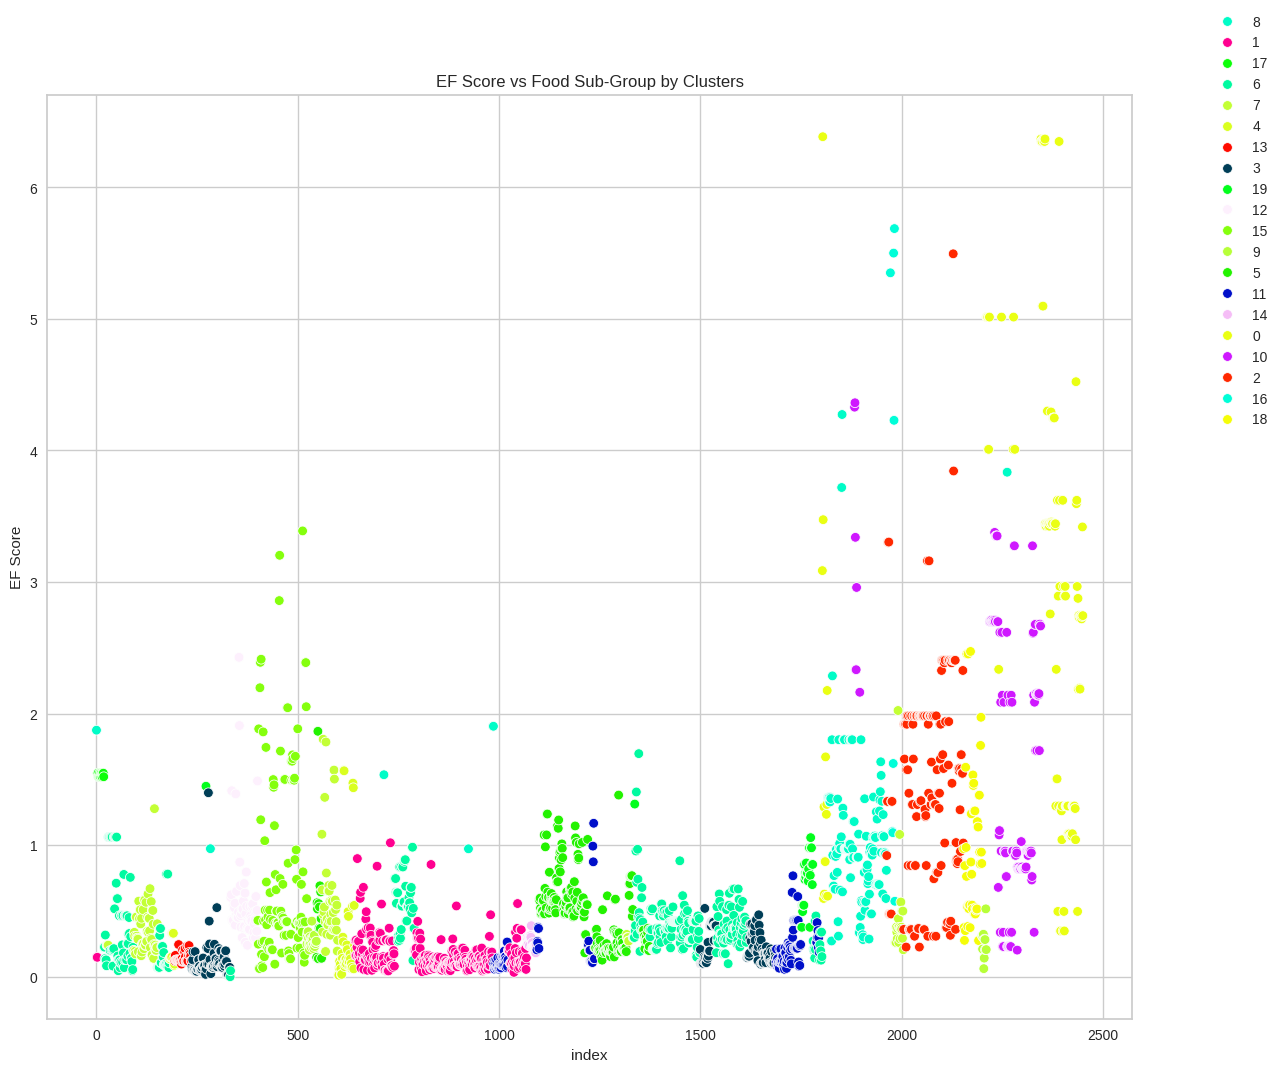

In [245]:
# Create figure and adjust size
plt.figure(figsize=(14,12))

cmap = plt.cm.get_cmap("gist_ncar", 60) 
palette = [cmap(i) for i in range(60)]

cmap = plt.cm.get_cmap("gist_ncar", 60 * 5)  # Sample from a wider range

# Select non-continuous indices to avoid smooth gradients
indices = np.random.choice(range(cmap.N), 60, replace=False) 
palette = [cmap(i) for i in indices]


# Create count plot
ax = sns.scatterplot(df_o, x=df_o.index, y='EF Score', hue='label_str', legend=True, palette=palette)

# Add title
ax.set_title(f'EF Score vs Food Sub-Group by Clusters')

# Add axis labels
ax.set_xlabel('index')
ax.set_ylabel('EF Score')

#
#ax.set_xticklabels(df_o['Food Sub-group'].unique(),rotation=90)

plt.legend(loc='upper center', bbox_to_anchor=(1.1, 1.1), ncol=1)

# Show plot
plt.show()


/tmp/ipykernel_3596703/316389407.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("gist_ncar", 60)
/tmp/ipykernel_3596703/316389407.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("gist_ncar", 60 * 5)  # Sample from a wider range
/tmp/ipykernel_3596703/316389407.py:16: UserWarning: The palette list has more values (60) than needed (20), which may not be intended.
  ax = sns.scatterplot(df_o, x='Food Sub-group', y='EF Score', hue='label_str', legend=True, palette=palette)
/tmp/ipykernel_3596703/316389407.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ti

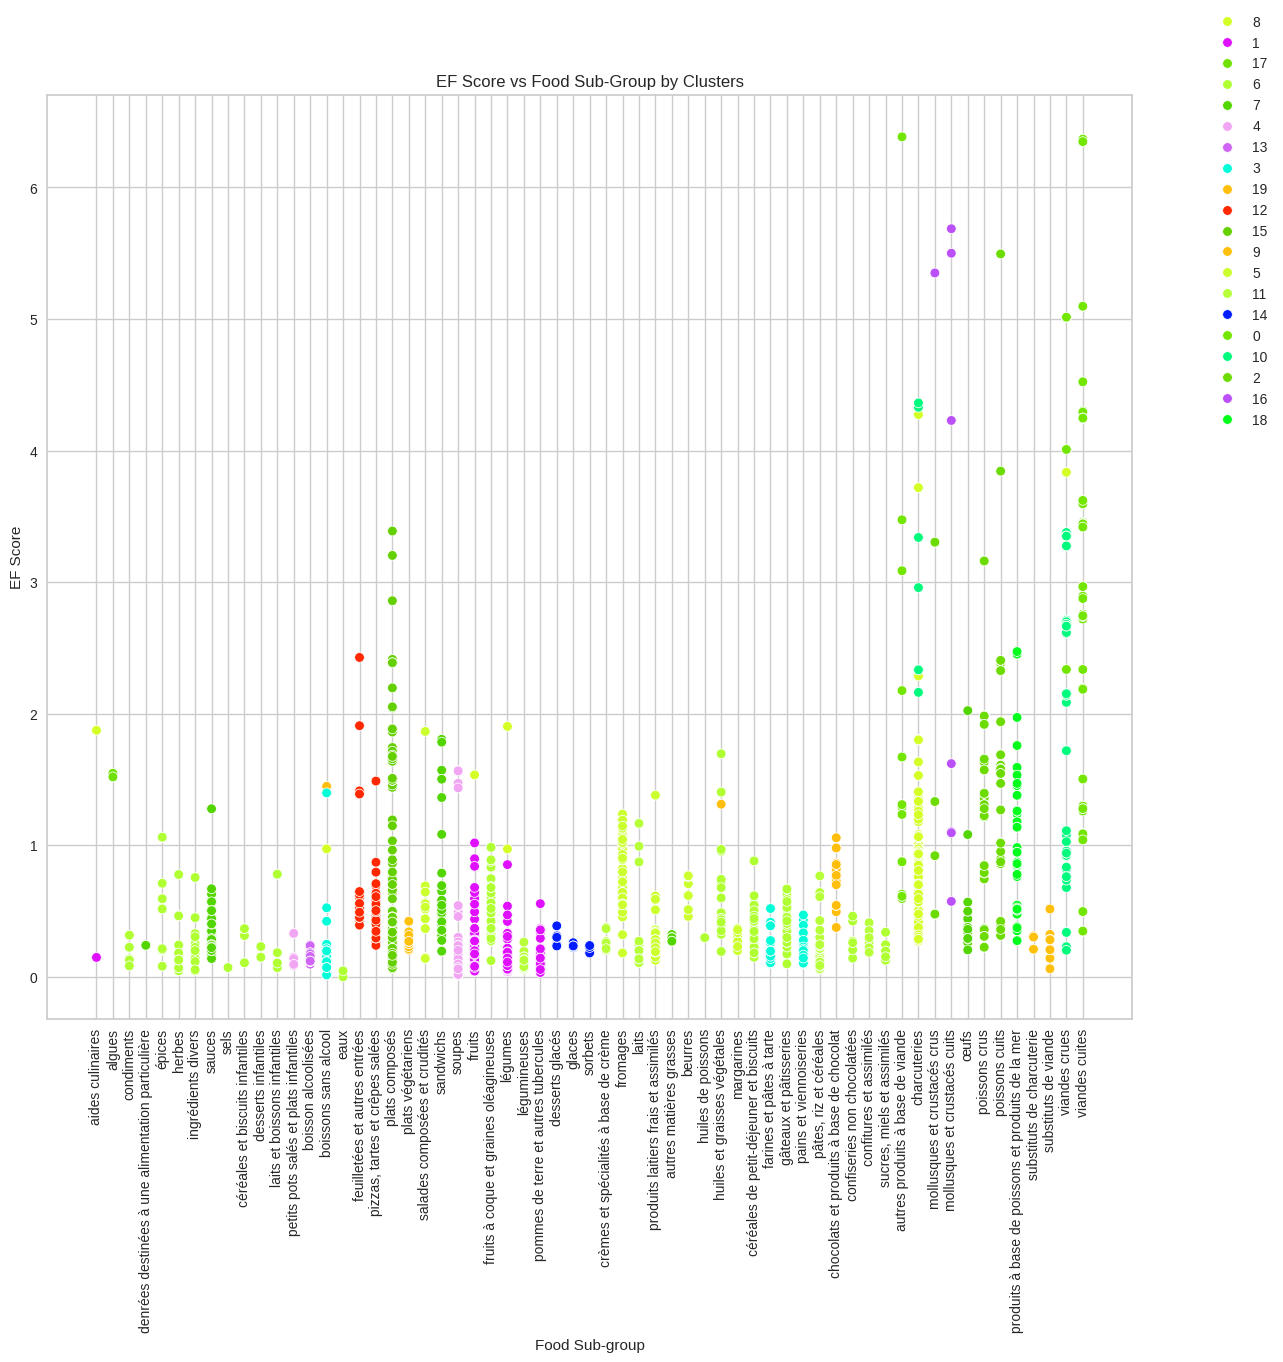

In [246]:
# Create figure and adjust size
plt.figure(figsize=(14,12))

cmap = plt.cm.get_cmap("gist_ncar", 60) 
palette = [cmap(i) for i in range(60)]


cmap = plt.cm.get_cmap("gist_ncar", 60 * 5)  # Sample from a wider range

# Select non-continuous indices to avoid smooth gradients
indices = np.random.choice(range(cmap.N), 60, replace=False) 
palette = [cmap(i) for i in indices]


# Create count plot
ax = sns.scatterplot(df_o, x='Food Sub-group', y='EF Score', hue='label_str', legend=True, palette=palette)

# Add title
ax.set_title(f'EF Score vs Food Sub-Group by Clusters')

# Add axis labels
ax.set_xlabel('Food Sub-group')
ax.set_ylabel('EF Score')

#
ax.set_xticklabels(df_o['Food Sub-group'].unique(),rotation=90)

plt.legend(loc='upper center', bbox_to_anchor=(1.1, 1.1), ncol=1)

# Show plot
plt.show()


---
### Creating an Agglomerative Clustering model with 80 clusters

---

**Create intance of model**

In [247]:
ac = AgglomerativeClustering(n_clusters= 80, metric='euclidean', linkage='ward')

**Fit the model on the dataset**

In [248]:
ac.fit(X_scaled)

AgglomerativeClustering(n_clusters=80)

---
### Evaluate the value K=80 for number of cluster

---

**Add Cluster labels to the cleaned dataframe**

In [249]:
df_o['label'] = ac.labels_

df_o['label_str'] = ac.labels_.astype(str)

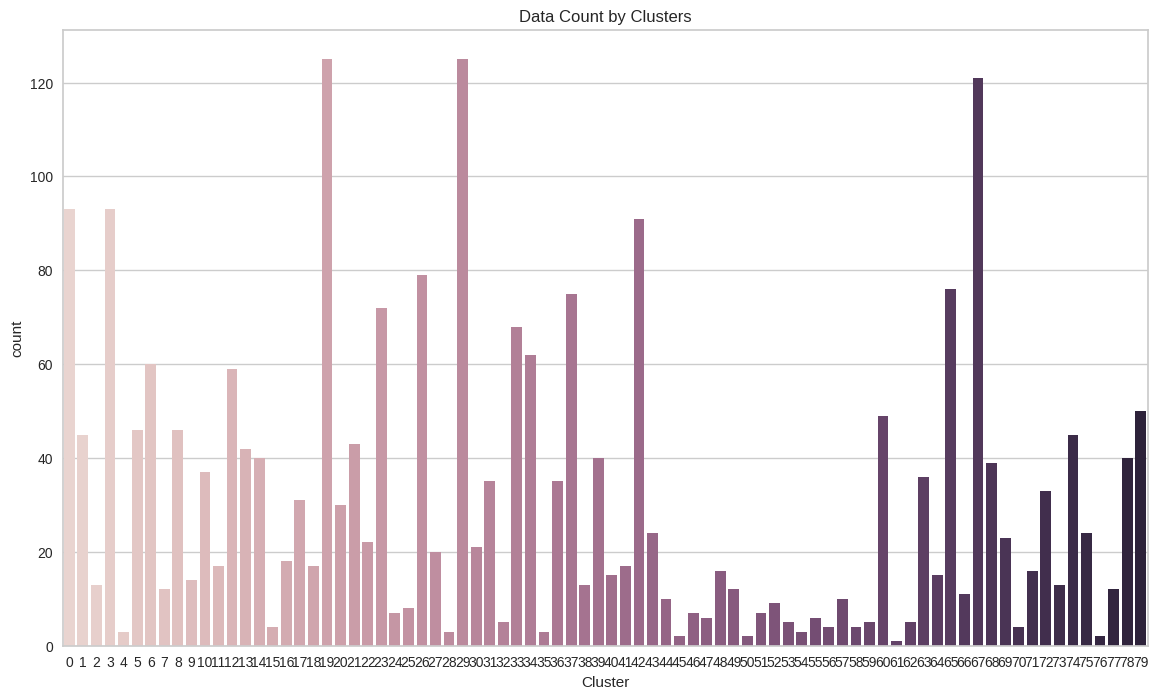

In [250]:
# Create figure and adjust size
plt.figure(figsize=(14,8))

# Create count plot
ax = sns.countplot(x=df_o['label'], hue=df_o['label'], legend=False)

# Add title
ax.set_title('Data Count by Clusters')

# Add axis labels
ax.set_xlabel('Cluster')

# Show plot
plt.show()

/tmp/ipykernel_3596703/1891239328.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("gist_ncar", 80)
/tmp/ipykernel_3596703/1891239328.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("gist_ncar", 80 * 5)  # Sample from a wider range


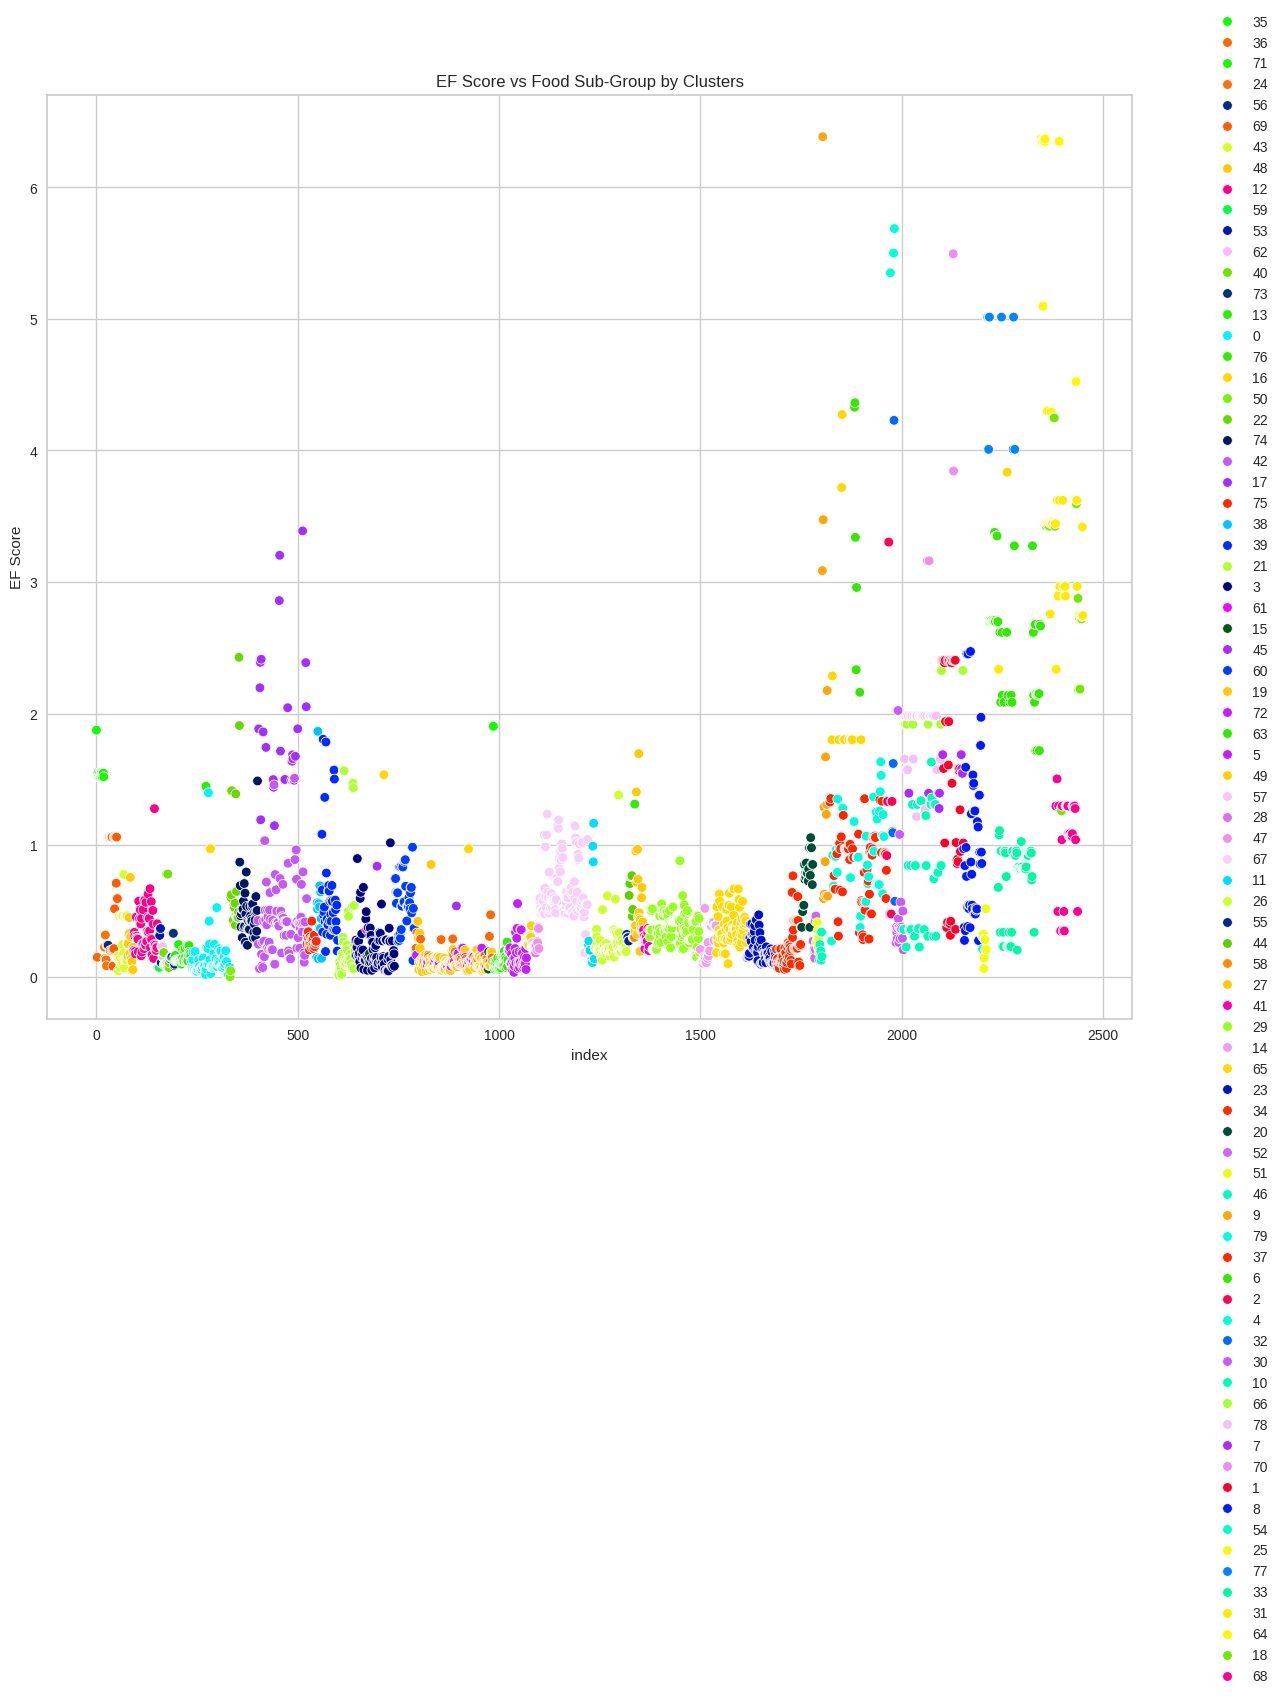

In [251]:
# Create figure and adjust size
plt.figure(figsize=(14,12))

cmap = plt.cm.get_cmap("gist_ncar", 80) 
palette = [cmap(i) for i in range(80)]

cmap = plt.cm.get_cmap("gist_ncar", 80 * 5)  # Sample from a wider range

# Select non-continuous indices to avoid smooth gradients
indices = np.random.choice(range(cmap.N), 80, replace=False) 
palette = [cmap(i) for i in indices]


# Create count plot
ax = sns.scatterplot(df_o, x=df_o.index, y='EF Score', hue='label_str', legend=True, palette=palette)

# Add title
ax.set_title(f'EF Score vs Food Sub-Group by Clusters')

# Add axis labels
ax.set_xlabel('index')
ax.set_ylabel('EF Score')

#
#ax.set_xticklabels(df_o['Food Sub-group'].unique(),rotation=90)

plt.legend(loc='upper center', bbox_to_anchor=(1.1, 1.1), ncol=1)

# Show plot
plt.show()


/tmp/ipykernel_3596703/183826753.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("gist_ncar", 80)
/tmp/ipykernel_3596703/183826753.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("gist_ncar", 80 * 5)  # Sample from a wider range
/tmp/ipykernel_3596703/183826753.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df_o['Food Sub-group'].unique(),rotation=90)


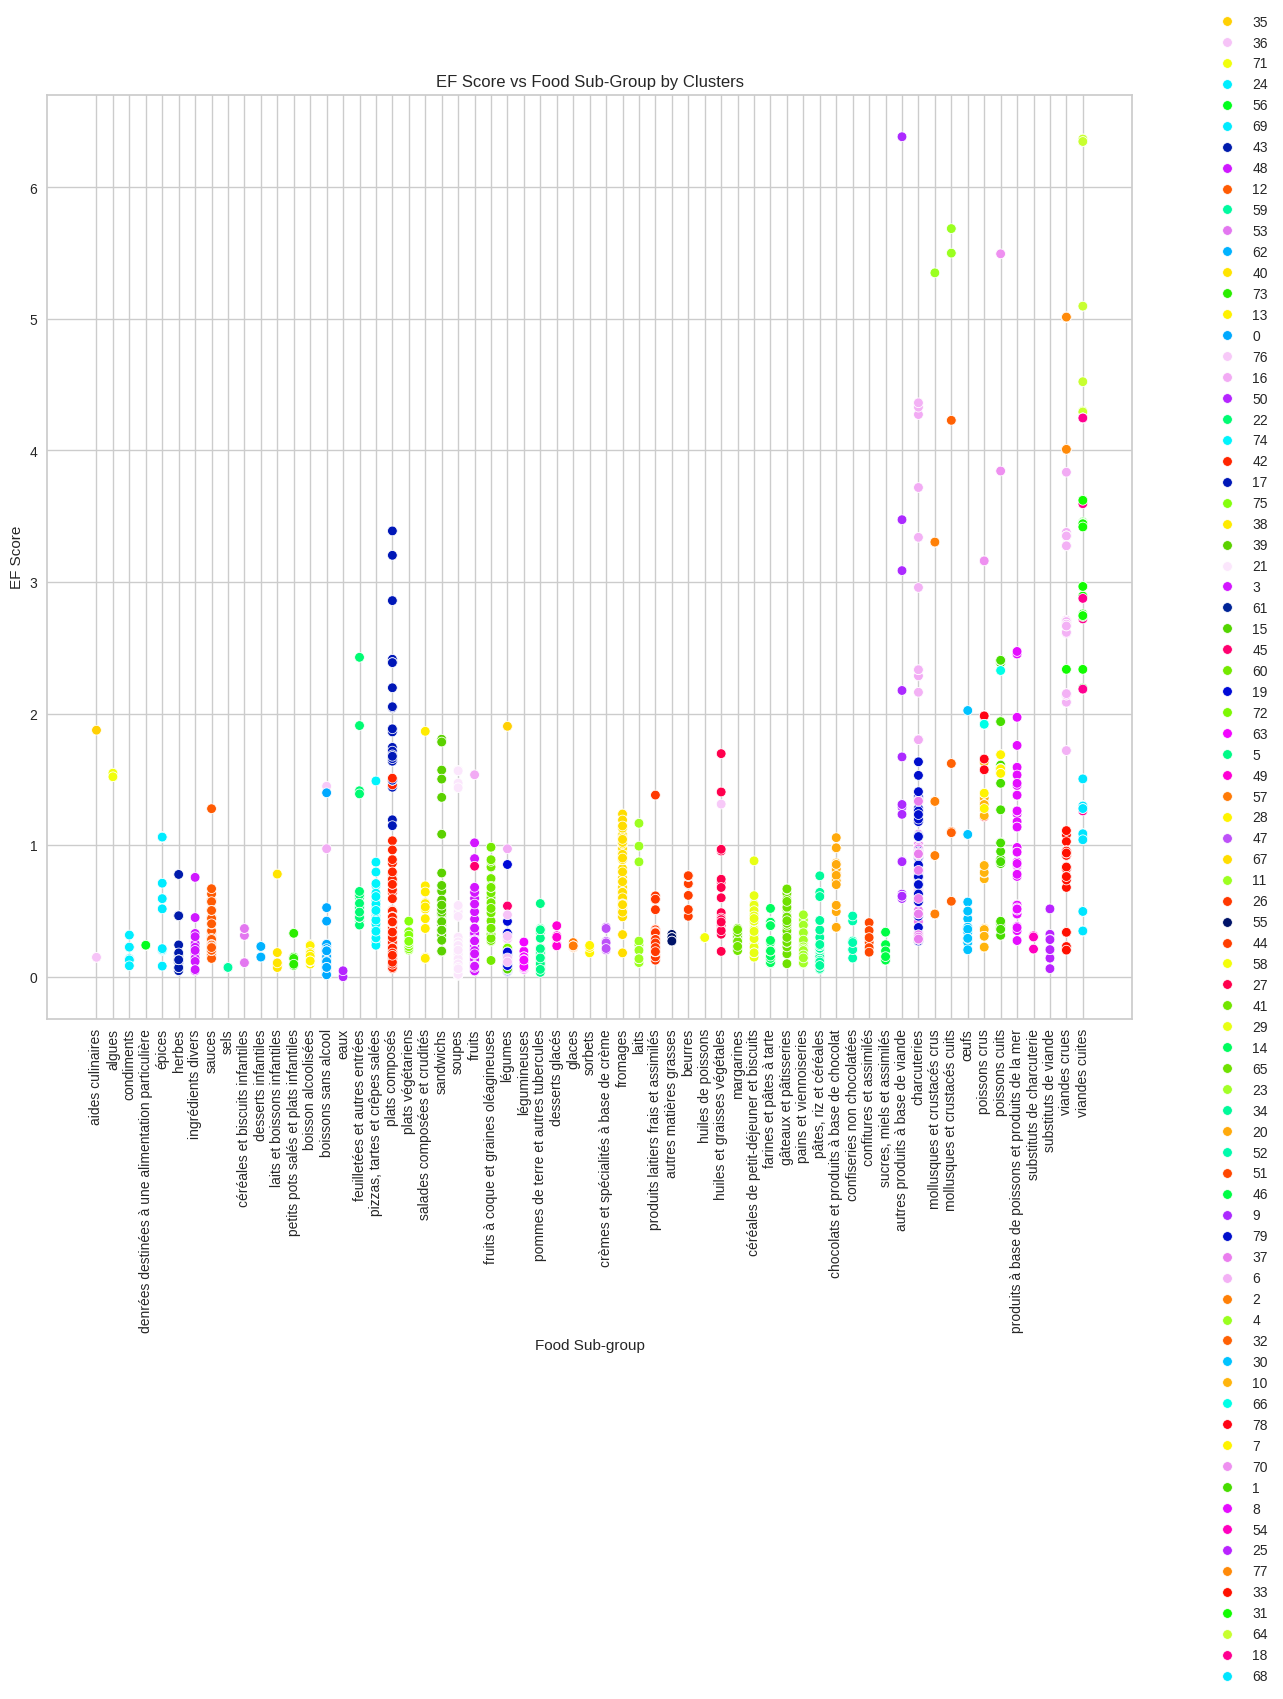

In [252]:
# Create figure and adjust size
plt.figure(figsize=(14,12))

cmap = plt.cm.get_cmap("gist_ncar", 80) 
palette = [cmap(i) for i in range(80)]

cmap = plt.cm.get_cmap("gist_ncar", 80 * 5)  # Sample from a wider range

# Select non-continuous indices to avoid smooth gradients
indices = np.random.choice(range(cmap.N), 80, replace=False) 
palette = [cmap(i) for i in indices]

# Create count plot
ax = sns.scatterplot(df_o, x='Food Sub-group', y='EF Score', hue='label_str', legend=True, palette=palette)

# Add title
ax.set_title(f'EF Score vs Food Sub-Group by Clusters')

# Add axis labels
ax.set_xlabel('Food Sub-group')
ax.set_ylabel('EF Score')

#
ax.set_xticklabels(df_o['Food Sub-group'].unique(),rotation=90)

plt.legend(loc='upper center', bbox_to_anchor=(1.1, 1.1), ncol=1)

# Show plot
plt.show()


/tmp/ipykernel_3596703/736422139.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("gist_ncar", 90)
/tmp/ipykernel_3596703/736422139.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("gist_ncar", 90 * 5)  # Sample from a wider range
/tmp/ipykernel_3596703/736422139.py:13: UserWarning: The palette list has more values (90) than needed (80), which may not be intended.
  ax = sns.scatterplot(df_o, x='Food Sub-group', y='EF Score', hue='label_str', legend=True, palette=palette)
/tmp/ipykernel_3596703/736422139.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ti

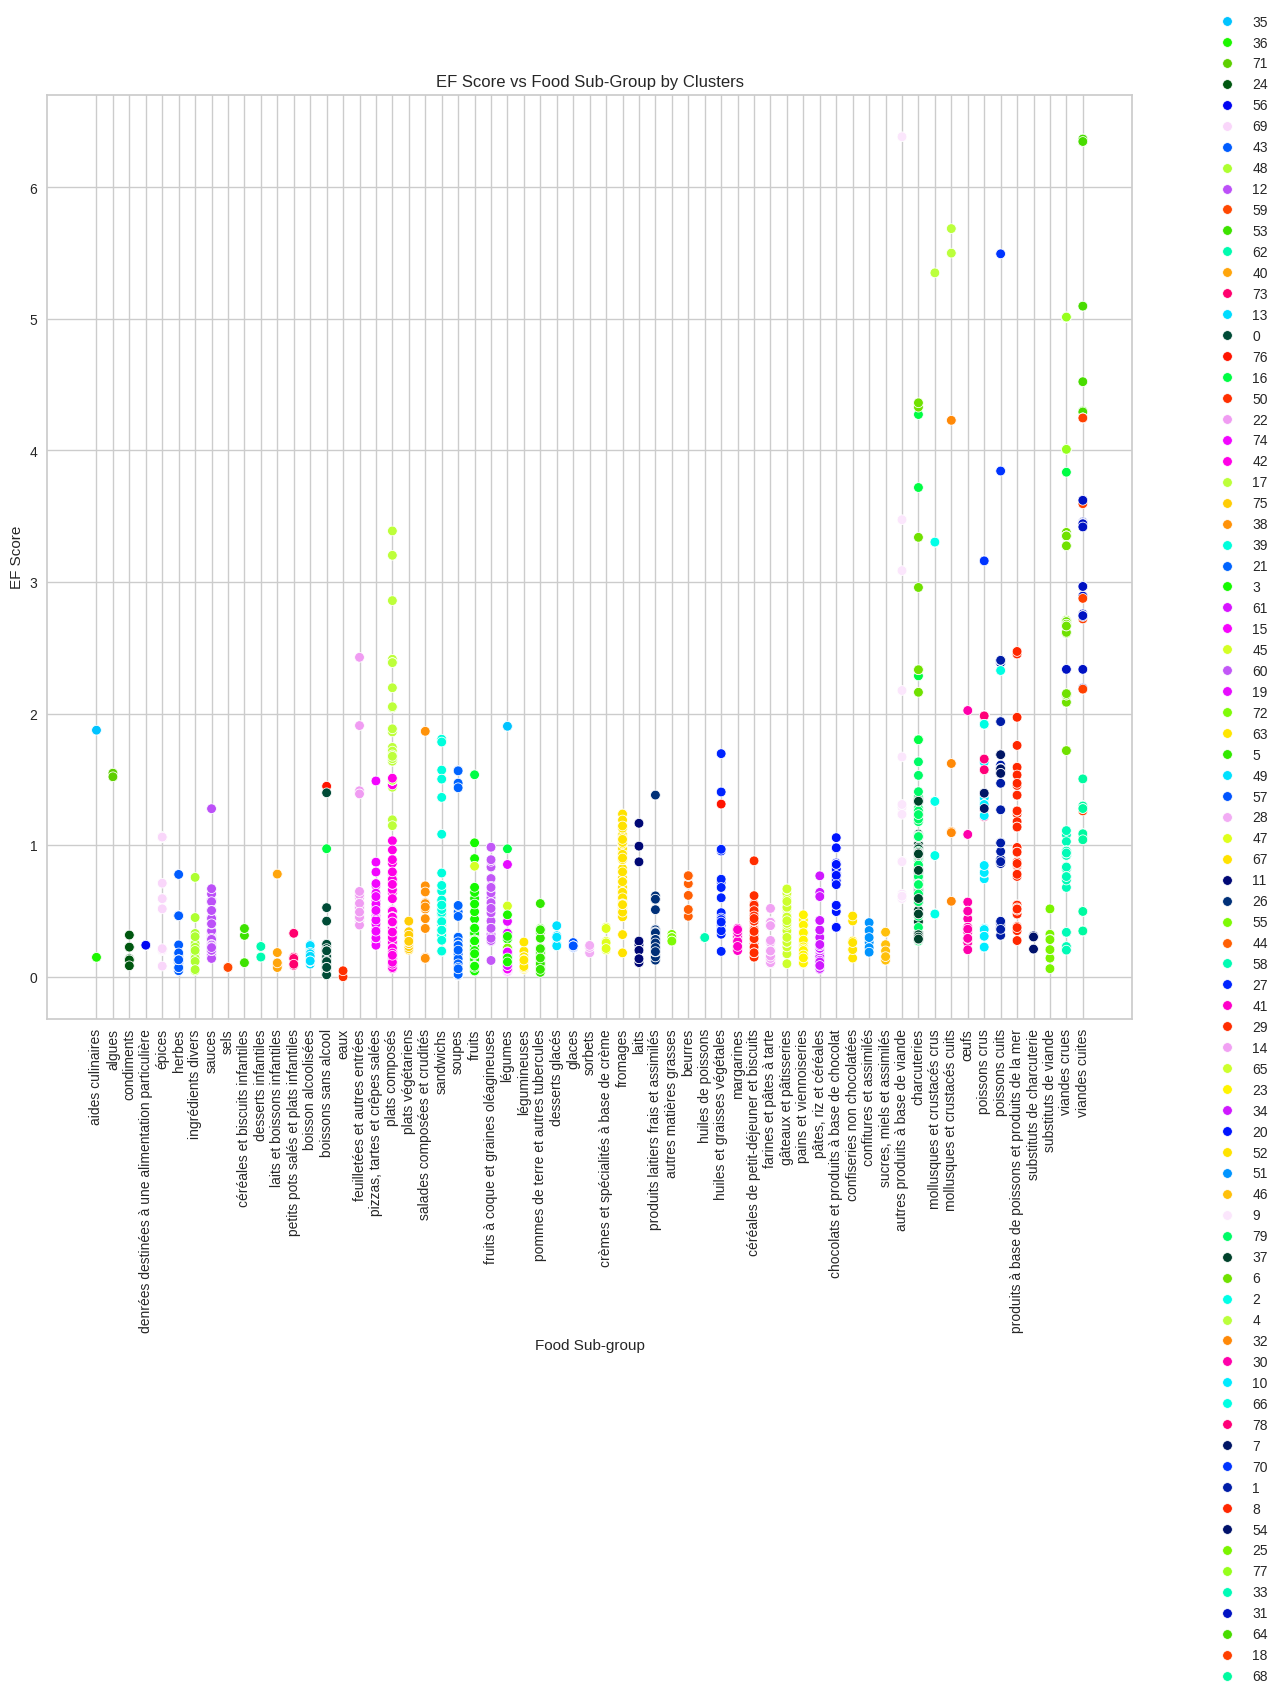

In [253]:
# Create figure and adjust size
plt.figure(figsize=(14,12))

cmap = plt.cm.get_cmap("gist_ncar", 90) 
palette = [cmap(i) for i in range(90)]
cmap = plt.cm.get_cmap("gist_ncar", 90 * 5)  # Sample from a wider range

# Select non-continuous indices to avoid smooth gradients
indices = np.random.choice(range(cmap.N), 90, replace=False) 
palette = [cmap(i) for i in indices]

# Create count plot
ax = sns.scatterplot(df_o, x='Food Sub-group', y='EF Score', hue='label_str', legend=True, palette=palette)

# Add title
ax.set_title(f'EF Score vs Food Sub-Group by Clusters')

# Add axis labels
ax.set_xlabel('Food Sub-group')
ax.set_ylabel('EF Score')

#
ax.set_xticklabels(df_o['Food Sub-group'].unique(),rotation=90)

plt.legend(loc='upper center', bbox_to_anchor=(1.1, 1.1), ncol=1)

# Show plot
plt.show()


---

<center>
    
## Agglomerative Clustering Model (data subset)

</center>

---

---
### Creating an Agglomerative Clustering model with the reduced amount of features

---

**Create intance of model**

In [254]:
ac = AgglomerativeClustering(n_clusters= 10, metric='euclidean', linkage='ward')

**Fit the model on the dataset**

In [255]:
ac.fit(X_sub_scaled)

AgglomerativeClustering(n_clusters=10)

### Saving the model

In [29]:
joblib.dump(best_model, "../model/AC_model.joblib")
joblib.dump(scaler, "../model/AC_scaler.joblib")

['../model/best_balanced_model_scaler.joblib']

---

<center>
    
## Validation

</center>

---

In [259]:
palette = [
    "green",
    "magenta",
    "deepskyblue",
    "darkorchid",
    "lightpink",
    "darkorange",
    "red",
    "navy",
    "chartreuse",
    "tomato",
    "turquoise",
    "dodgerblue",
    "yellowgreen",
    "deeppink",
    "springgreen"
]

**Add Cluster labels to the cleaned dataframe**

In [257]:
df_o['label'] = ac.labels_

df_o['label_str'] = ac.labels_.astype(str)

/tmp/ipykernel_3596703/1084803089.py:5: UserWarning: The palette list has more values (15) than needed (10), which may not be intended.
  ax = sns.countplot(x=df_o['label'], hue=df_o['label'], legend=False, palette=palette)


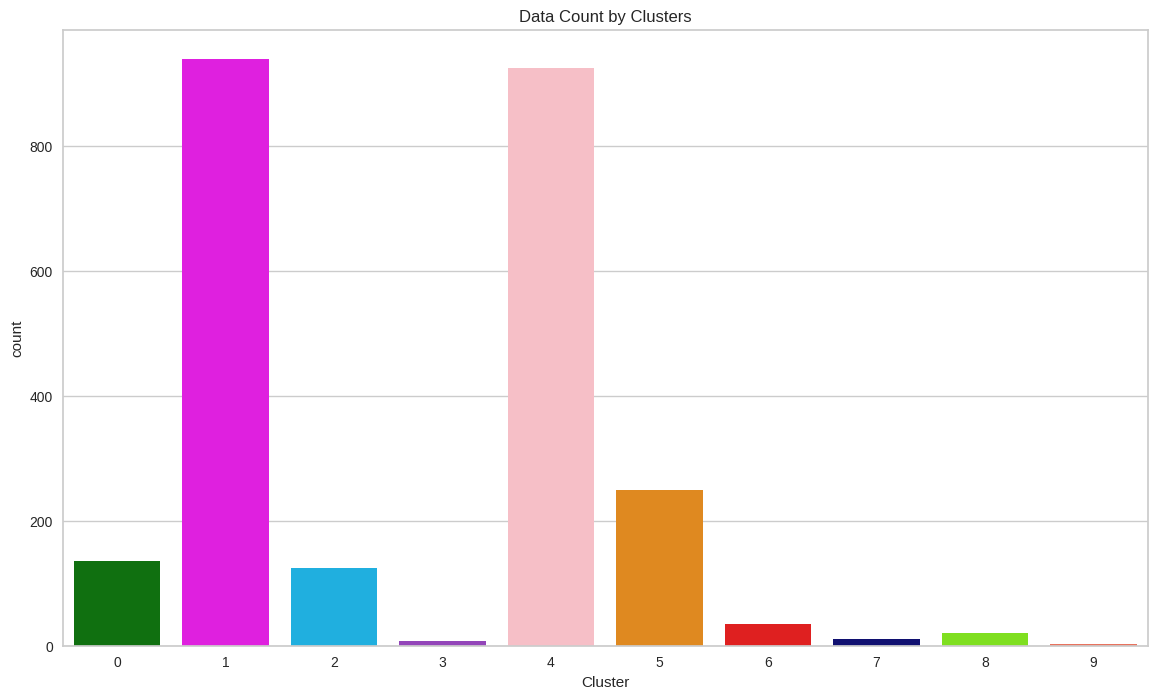

In [304]:
# Create figure and adjust size
plt.figure(figsize=(14,8))

# Create count plot
ax = sns.countplot(x=df_o['label'], hue=df_o['label'], legend=False, palette=palette)

# Add title
ax.set_title('Data Count by Clusters')

# Add axis labels
ax.set_xlabel('Cluster')

# Show plot
plt.show()

/tmp/ipykernel_3596703/1202278269.py:6: UserWarning: The palette list has more values (15) than needed (10), which may not be intended.
  ax = sns.scatterplot(df_o, x=df_o.index, y='EF Score', hue='label_str', legend=True, palette=palette)


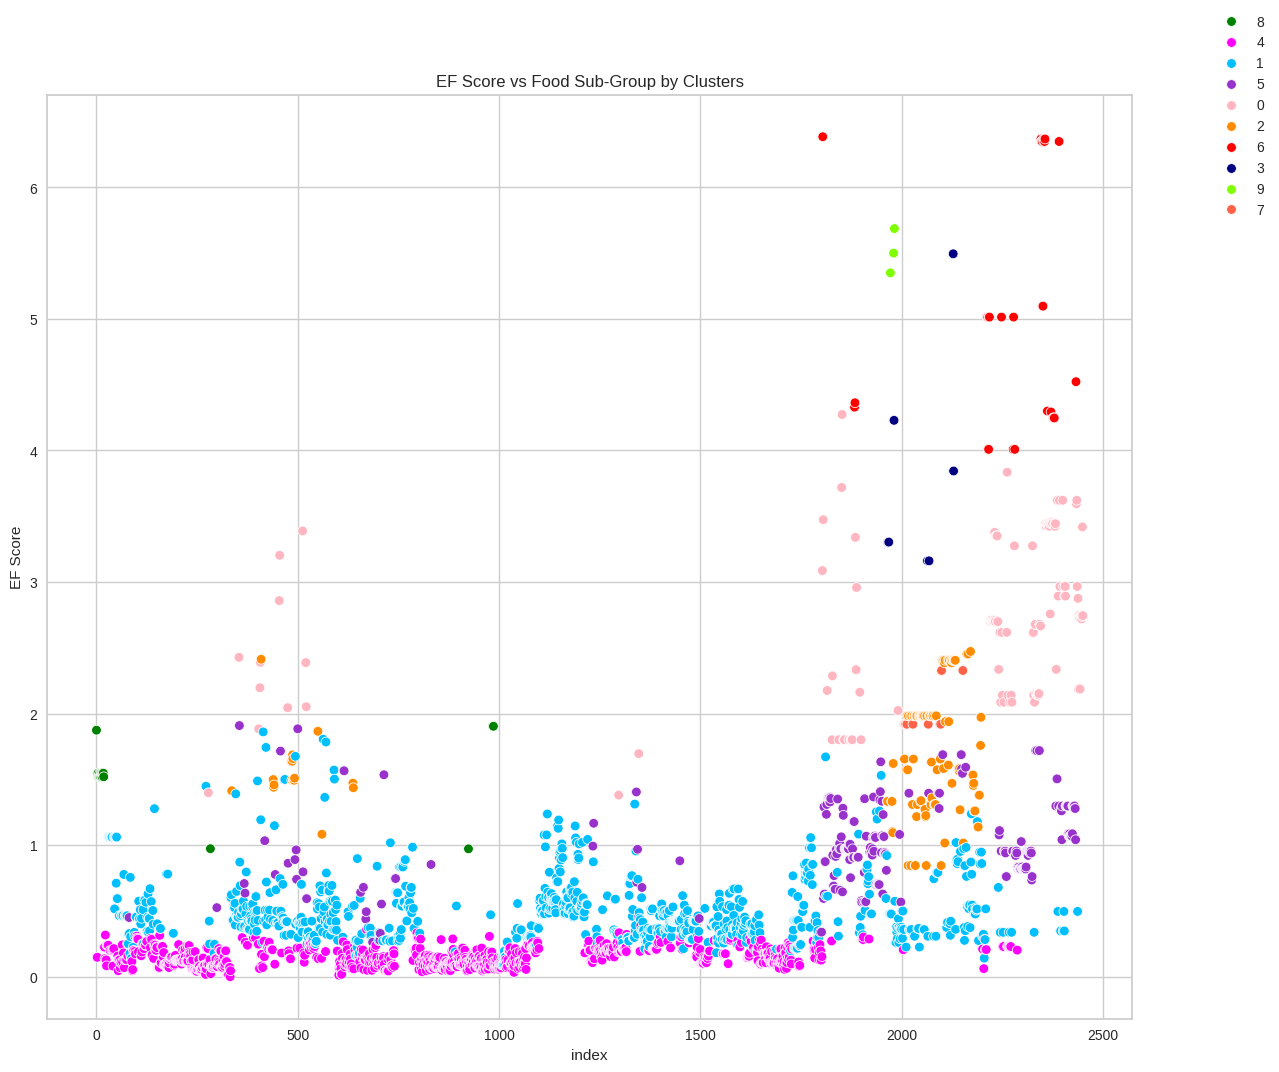

In [260]:
# Create figure and adjust size
plt.figure(figsize=(14,12))


# Create count plot
ax = sns.scatterplot(df_o, x=df_o.index, y='EF Score', hue='label_str', legend=True, palette=palette)

# Add title
ax.set_title(f'EF Score vs Food Sub-Group by Clusters')

# Add axis labels
ax.set_xlabel('index')
ax.set_ylabel('EF Score')

#
#ax.set_xticklabels(df_o['Food Sub-group'].unique(),rotation=90)

plt.legend(loc='upper center', bbox_to_anchor=(1.1, 1.1), ncol=1)

# Show plot
plt.show()


/tmp/ipykernel_3596703/922373828.py:5: UserWarning: The palette list has more values (15) than needed (10), which may not be intended.
  ax = sns.scatterplot(df_o, x='Food Sub-group', y='EF Score', hue='label_str', legend=True, palette=palette)
/tmp/ipykernel_3596703/922373828.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df_o['Food Sub-group'].unique(),rotation=90)


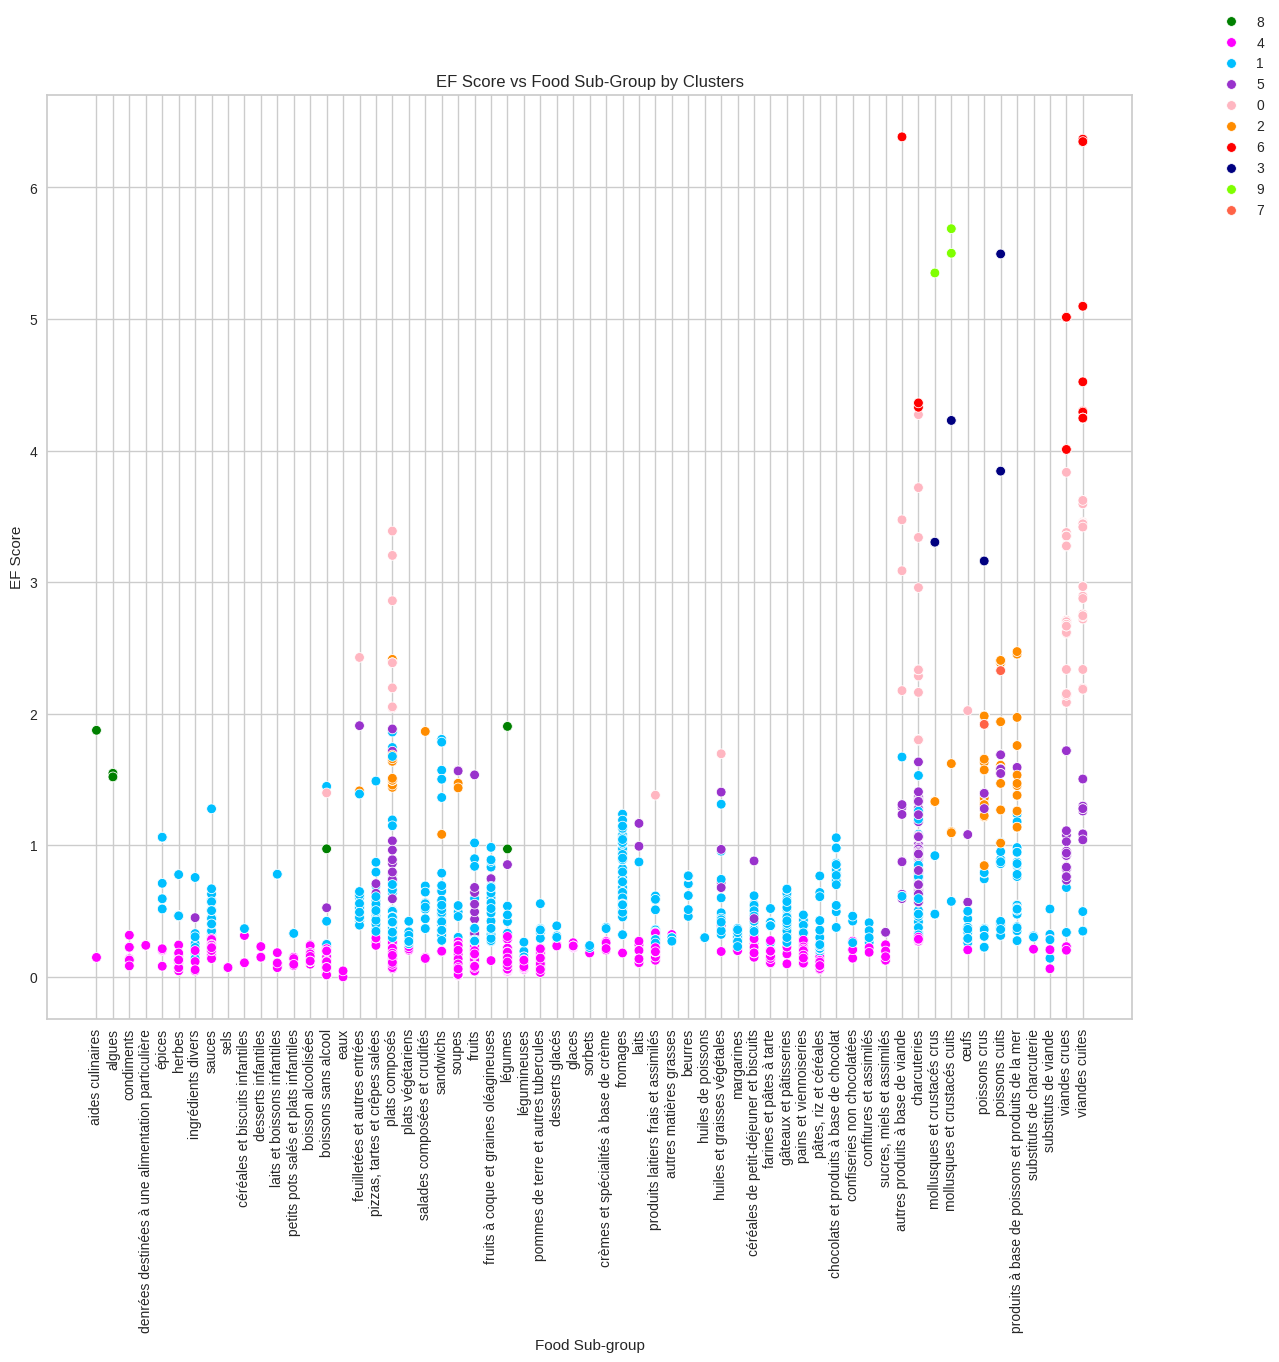

In [261]:
# Create figure and adjust size
plt.figure(figsize=(14,12))

# Create count plot
ax = sns.scatterplot(df_o, x='Food Sub-group', y='EF Score', hue='label_str', legend=True, palette=palette)

# Add title
ax.set_title(f'EF Score vs Food Sub-Group by Clusters')

# Add axis labels
ax.set_xlabel('Food Sub-group')
ax.set_ylabel('EF Score')

#
ax.set_xticklabels(df_o['Food Sub-group'].unique(),rotation=90)

plt.legend(loc='upper center', bbox_to_anchor=(1.1, 1.1), ncol=1)

# Show plot
plt.show()


/tmp/ipykernel_3596703/1623807048.py:6: UserWarning: The palette list has more values (15) than needed (10), which may not be intended.
  ax = sns.scatterplot(df_o, x='Food Group', y='EF Score', hue='label_str', legend=True, palette=palette)
/tmp/ipykernel_3596703/1623807048.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df_o['Food Group'].unique(),rotation=90)


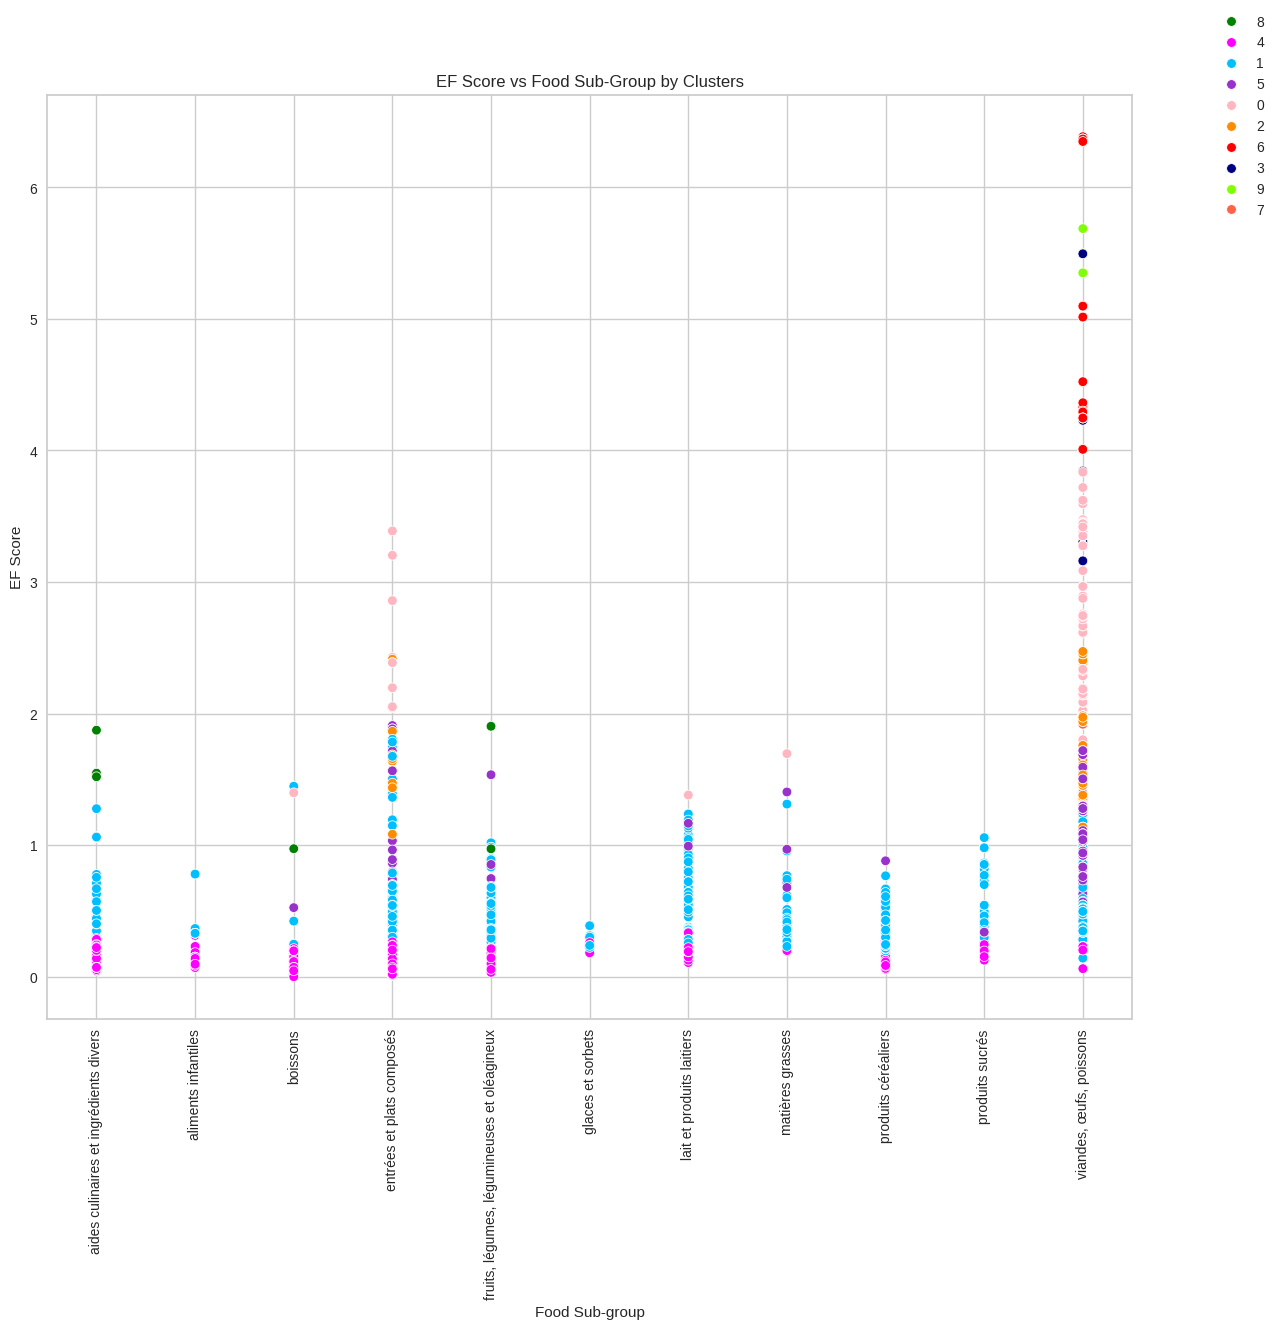

In [262]:
# Create figure and adjust size
plt.figure(figsize=(14,12))


# Create count plot
ax = sns.scatterplot(df_o, x='Food Group', y='EF Score', hue='label_str', legend=True, palette=palette)

# Add title
ax.set_title(f'EF Score vs Food Sub-Group by Clusters')

# Add axis labels
ax.set_xlabel('Food Sub-group')
ax.set_ylabel('EF Score')

#
ax.set_xticklabels(df_o['Food Group'].unique(),rotation=90)

plt.legend(loc='upper center', bbox_to_anchor=(1.1, 1.1), ncol=1)

# Show plot
plt.show()


Index([4, 1, 5, 8, 2, 7, 0, 3, 6, 9], dtype='int64', name='label')


/tmp/ipykernel_3596703/638961807.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(df_o, x='label', y='EF Score', order=sorted_labels, legend=True, palette=palette)
/tmp/ipykernel_3596703/638961807.py:8: UserWarning: The palette list has more values (15) than needed (10), which may not be intended.
  ax = sns.boxplot(df_o, x='label', y='EF Score', order=sorted_labels, legend=True, palette=palette)


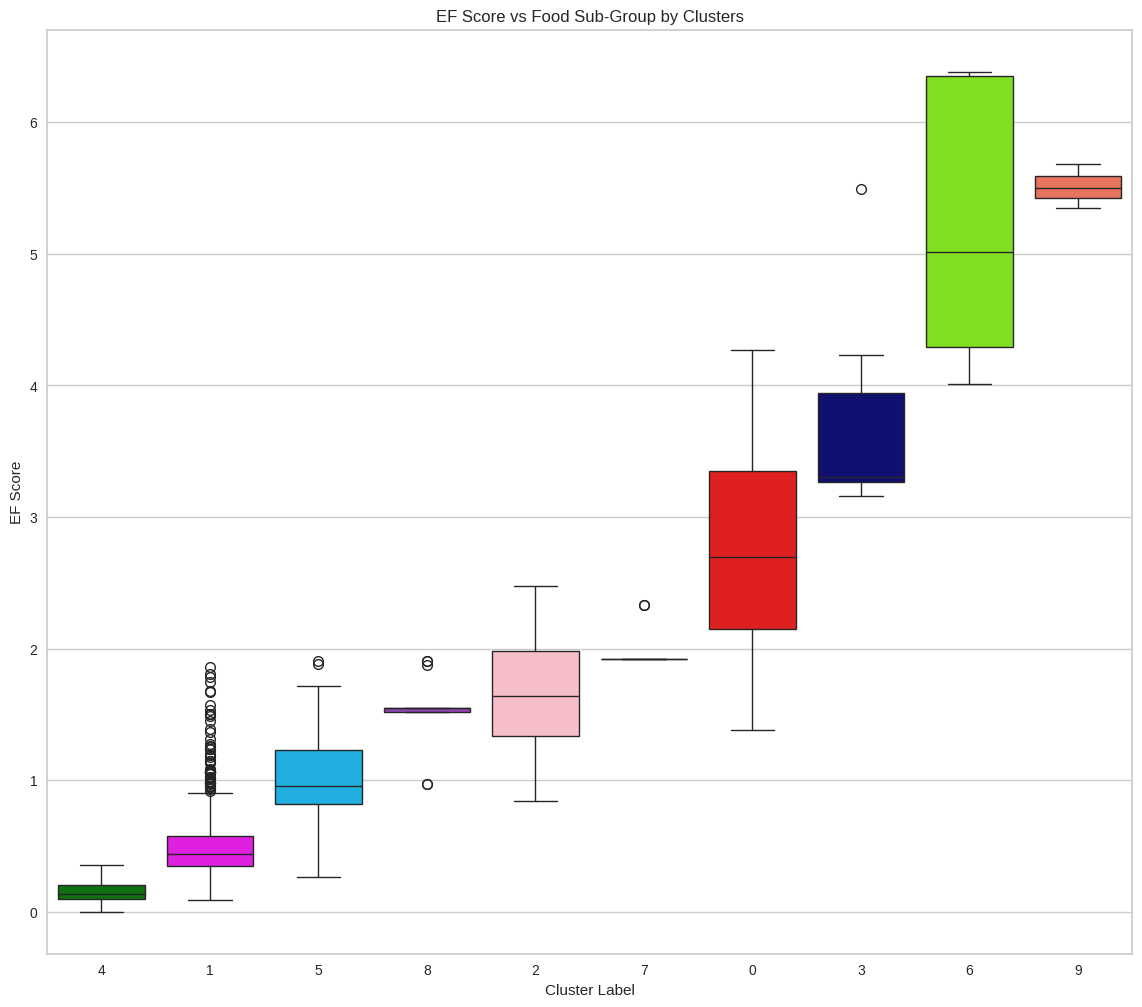

In [263]:
# Create figure and adjust size
plt.figure(figsize=(14,12))


sorted_labels = df_o.groupby("label")["EF Score"].mean().sort_values().index
print(sorted_labels)
# Create count plot
ax = sns.boxplot(df_o, x='label', y='EF Score', order=sorted_labels, legend=True, palette=palette)

# Add title
ax.set_title(f'EF Score vs Food Sub-Group by Clusters')

# Add axis labels
ax.set_xlabel('Cluster Label')
ax.set_ylabel('EF Score')

# Show plot
plt.show()


In [264]:
df_o.groupby("label")[cols].mean()

Photochemical Ozone Formation  Fine Particles  \
label                                                  
0                           0.045683    2.612937e-06   
1                           0.014234    3.740154e-07   
2                           0.194206    2.025842e-06   
3                           0.058546    9.233374e-07   
4                           0.004005    8.881327e-08   
5                           0.020251    8.461666e-07   
6                           0.072517    5.828896e-06   
7                           0.063464    7.395349e-07   
8                           0.044151    7.670427e-07   
9                           0.412427    3.968371e-06   

       Toxicological Effects (Non-carcinogenic)  \
label                                             
0                                  3.767577e-07   
1                                  7.989099e-08   
2                                  7.268540e-08   
3                                  1.906056e-07   
4                                  2.664526e-08   
5                                  9.586270e-08   
6                                  7.821430e-07   
7                                  2.736517e-07   
8                                  1.187596e-07   
9                                  6.331796e-07   

       Toxicological Effects (Carcinogenic)  Freshwater Eutrophication  \
label                                                                    
0                              1.298058e-08                   0.001691   
1                              2.858892e-09                   0.000648   
2                              6.501414e-09                   0.000629   
3                              1.157687e-08                   0.018190   
4                              1.083645e-09                   0.000214   
5                              5.884607e-09                   0.002182   
6                              2.104646e-08                   0.002131   
7                              4.381009e-09                   0.000949   
8                              7.102264e-09                   0.001963   
9                              3.897348e-08                   0.008202   

       Marine Eutrophication  Ecotoxicity for Freshwater Aquatic Ecosystems  \
label                                                                         
0                   0.087397                                     240.232920   
1                   0.020541                                      53.973180   
2                   0.065426                                      66.062019   
3                   0.106626                                     272.855207   
4                   0.005285                                      17.030129   
5                   0.036697                                     190.335614   
6                   0.164597                                     225.544903   
7                   0.570878                                     139.406486   
8                   0.016445                                      61.224898   
9                   0.131893                                     303.947193   

          Land Use  Water Resource Depletion  Energy Resource Depletion  \
label                                                                     
0      1685.357903                  3.901220                 113.906860   
1       257.263524                  3.246297                  42.349281   
2        33.375752                  1.217287                 144.604640   
3       208.751874                264.385940                 189.133765   
4        55.842061                  1.065639                  20.685960   
5       362.940205                  8.382920                  71.262836   
6      4364.708341                  6.694055                 105.037986   
7       191.673389                  2.745876                 182.720637   
8        50.125126                  5.005365                 420.408585   
9        87.678116                  2.518784              

**Clusters Interpretation**

4 - Lowest Environmental Footprint category
   - Lowest Fine Particles
   - Lowest Ecotoxicity for Freshwater Aquatic System
   - Low Land use
   - Lowest Energy Resource Depletion
   - Lowest Climate Change Impact
    
1 - Low Envrironmental Footprint category
   - Low Fine Particles
   - Low Ecotoxicity for Freshwater Aquatic System
   - Moderate Land Use
   - Low Energy Resource Depletion
   - Low Climate Change Impact

5 - Low Envrironmental Footprint category
    - Moderate Photochemical Ozone Formation
    - Low Water Eutrophication
    - High Water Ressource Depletion
    - Low Mineral Resource Depletion
    - Low Climate Change Impact
    
8 - Moderate-Low Envrironmental Footprint category
   - Low Land Use
   - High Energy Resource Depletion
   - Low-Moderate Climate Change
    
2 - Moderate Envrironmental Footprint category
   - High Photochemical Ozone Formation
   - High Fine Particles
   - Low Ecotoxicity for Freshwater Aquatic System
   - Low Land use
   - Second Lowest Water Resource Depletion
   - Moderate Energy Resource Depletion
   - Low-Moderate Climate Change

7 - Moderate Envrironmental Footprint category
   - Highest Water Eutrophication
   - High Land use
   - Low Water Resource Depletion
   - Moderate Energy Resource Depletion
   - Moderate Climate Change

0 - Moderate-High Environmental Footprint category
   - High Ecotoxicity  for Freshwater Aquatic System
   - Second Highest Land Use
   - Moderate Water Resource Depletion
   - Second Highest Climate Change Impact
    
3 - High Environmental Footprint category
    - Highest Freshwater Eutrophication
    - Extreme Water Resource Depletion
    
6 - High Environmental Footprint category
   - High Ecotoxicity  for Freshwater Aquatic System
   - Highest Land use
   - Highest Climate Change Impact
    
9 - Highest Environmental Footprint category
   - Highest Photochemical Ozone Formation
   - Highest Ecotoxicity for Freshwater Aquatic System
   - Highest Energy Resource Depletion
   - Highest Mineral Resource Depletion

In [151]:
cols

['Photochemical Ozone Formation',
 'Fine Particles',
 'Toxicological Effects (Non-carcinogenic)',
 'Toxicological Effects (Carcinogenic)',
 'Freshwater Eutrophication',
 'Marine Eutrophication',
 'Ecotoxicity for Freshwater Aquatic Ecosystems',
 'Land Use',
 'Water Resource Depletion',
 'Energy Resource Depletion',
 'Mineral Resource Depletion',
 'Climate Change',
 'EF Score']

/tmp/ipykernel_3596703/2358299720.py:6: UserWarning: The palette list has more values (15) than needed (10), which may not be intended.
  ax = sns.scatterplot(df_o, x=col, y='EF Score', hue='label', legend=True, palette=palette)


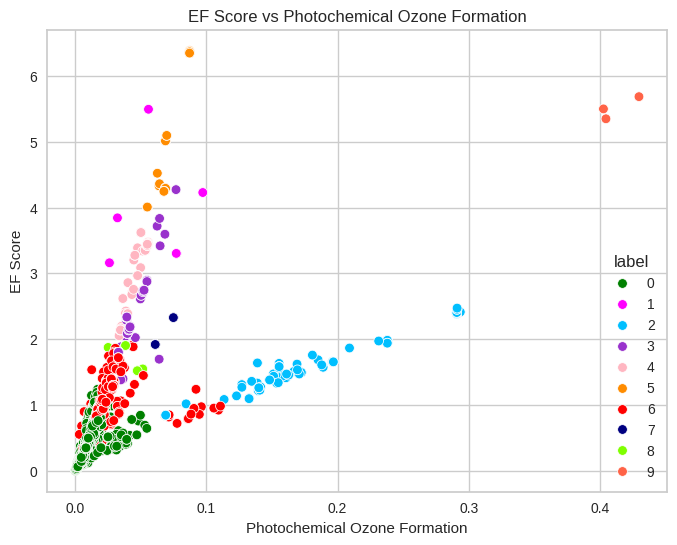

/tmp/ipykernel_3596703/2358299720.py:6: UserWarning: The palette list has more values (15) than needed (10), which may not be intended.
  ax = sns.scatterplot(df_o, x=col, y='EF Score', hue='label', legend=True, palette=palette)


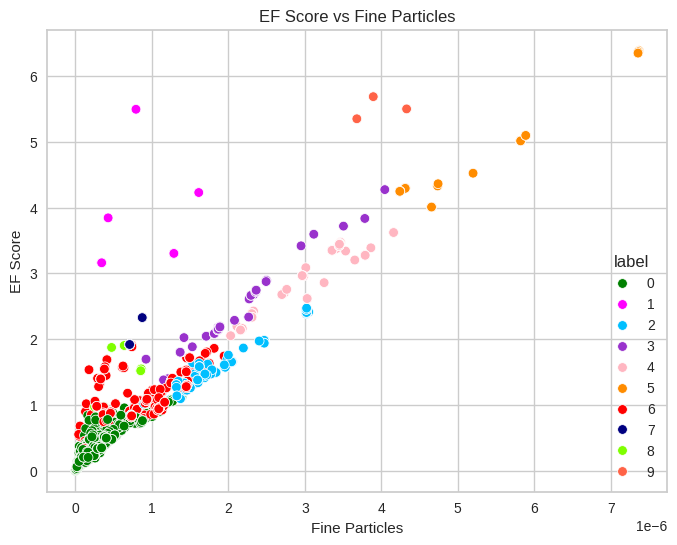

/tmp/ipykernel_3596703/2358299720.py:6: UserWarning: The palette list has more values (15) than needed (10), which may not be intended.
  ax = sns.scatterplot(df_o, x=col, y='EF Score', hue='label', legend=True, palette=palette)


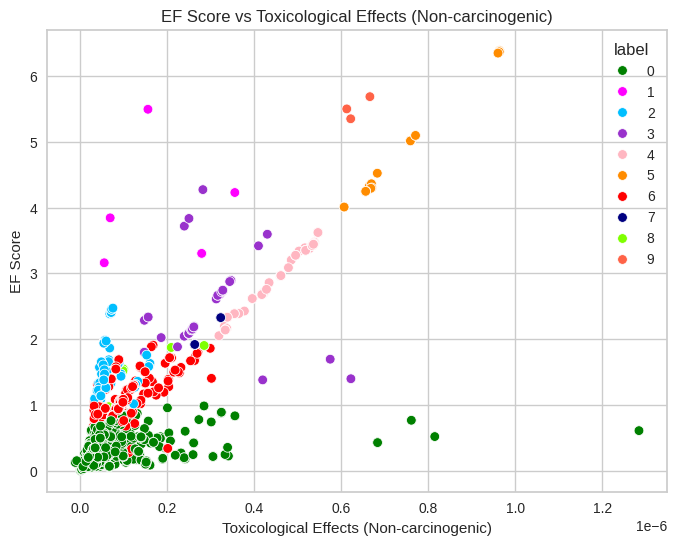

/tmp/ipykernel_3596703/2358299720.py:6: UserWarning: The palette list has more values (15) than needed (10), which may not be intended.
  ax = sns.scatterplot(df_o, x=col, y='EF Score', hue='label', legend=True, palette=palette)


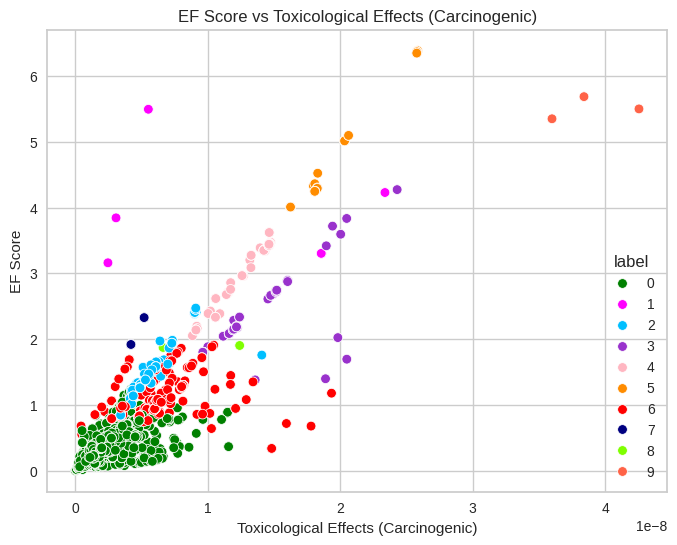

/tmp/ipykernel_3596703/2358299720.py:6: UserWarning: The palette list has more values (15) than needed (10), which may not be intended.
  ax = sns.scatterplot(df_o, x=col, y='EF Score', hue='label', legend=True, palette=palette)


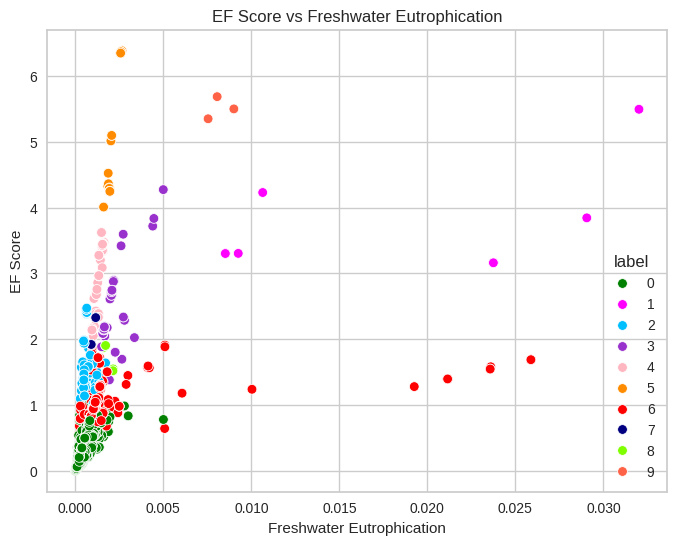

/tmp/ipykernel_3596703/2358299720.py:6: UserWarning: The palette list has more values (15) than needed (10), which may not be intended.
  ax = sns.scatterplot(df_o, x=col, y='EF Score', hue='label', legend=True, palette=palette)


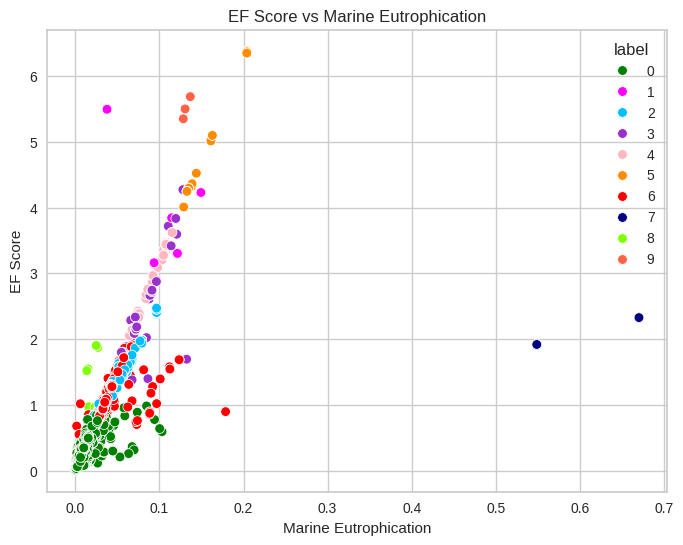

/tmp/ipykernel_3596703/2358299720.py:6: UserWarning: The palette list has more values (15) than needed (10), which may not be intended.
  ax = sns.scatterplot(df_o, x=col, y='EF Score', hue='label', legend=True, palette=palette)


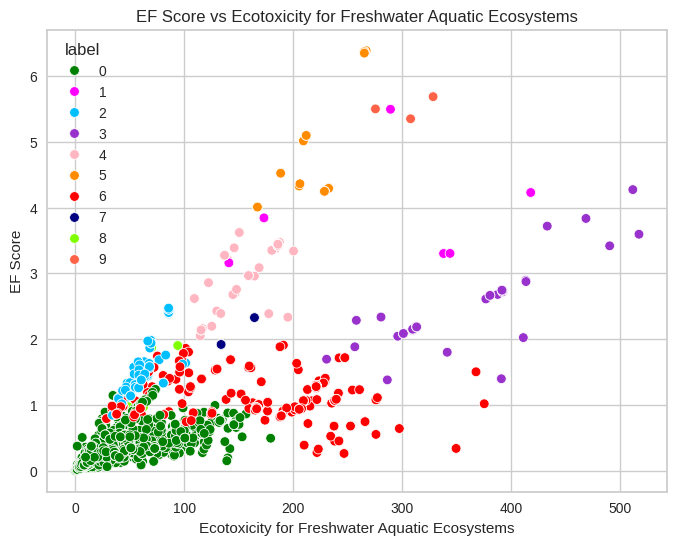

/tmp/ipykernel_3596703/2358299720.py:6: UserWarning: The palette list has more values (15) than needed (10), which may not be intended.
  ax = sns.scatterplot(df_o, x=col, y='EF Score', hue='label', legend=True, palette=palette)


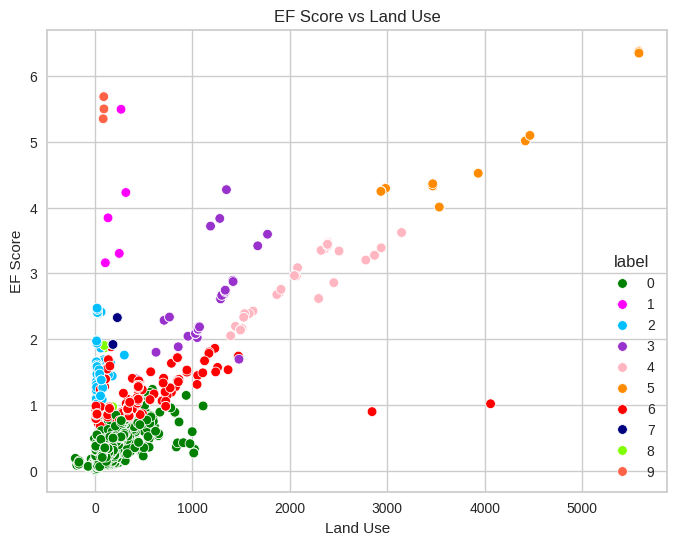

/tmp/ipykernel_3596703/2358299720.py:6: UserWarning: The palette list has more values (15) than needed (10), which may not be intended.
  ax = sns.scatterplot(df_o, x=col, y='EF Score', hue='label', legend=True, palette=palette)


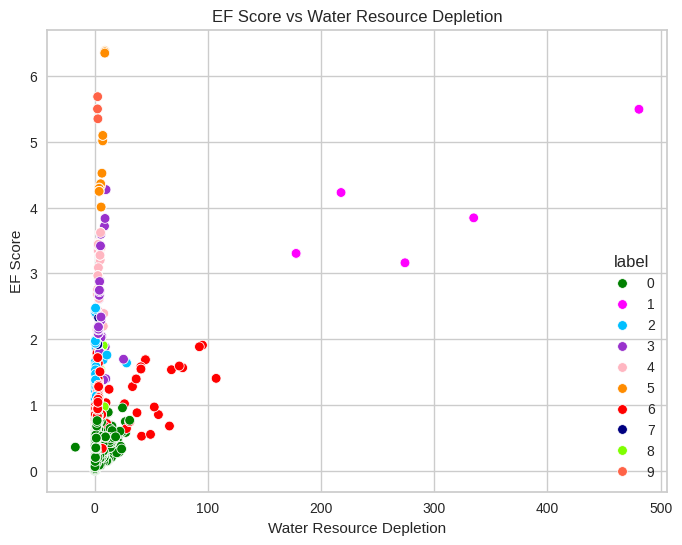

/tmp/ipykernel_3596703/2358299720.py:6: UserWarning: The palette list has more values (15) than needed (10), which may not be intended.
  ax = sns.scatterplot(df_o, x=col, y='EF Score', hue='label', legend=True, palette=palette)


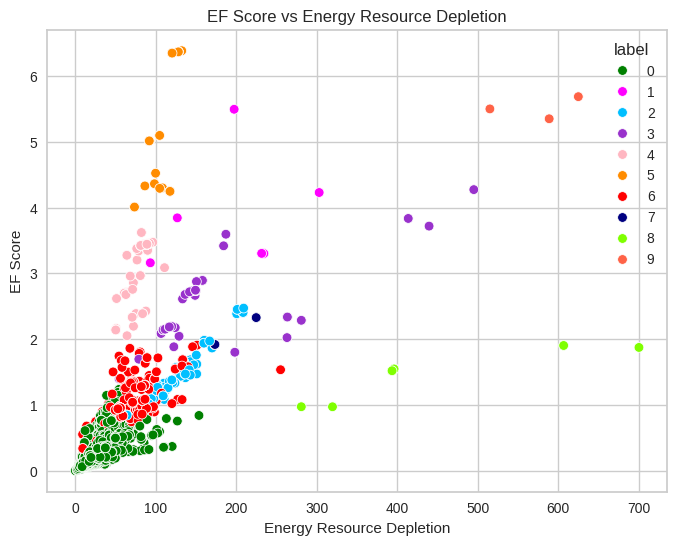

/tmp/ipykernel_3596703/2358299720.py:6: UserWarning: The palette list has more values (15) than needed (10), which may not be intended.
  ax = sns.scatterplot(df_o, x=col, y='EF Score', hue='label', legend=True, palette=palette)


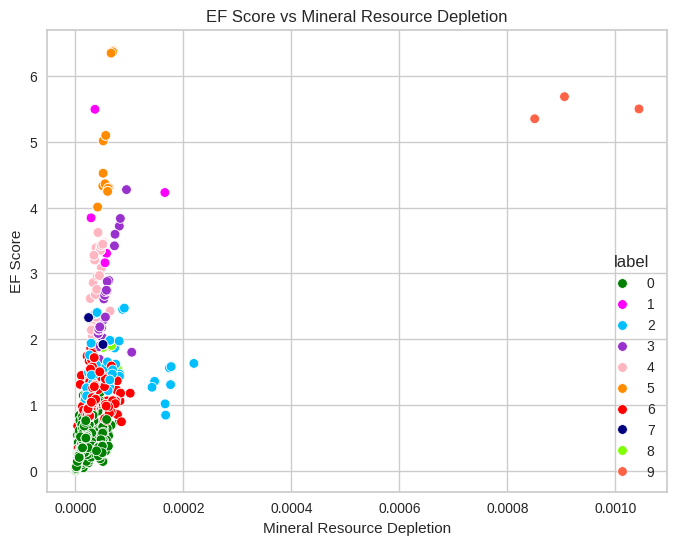

/tmp/ipykernel_3596703/2358299720.py:6: UserWarning: The palette list has more values (15) than needed (10), which may not be intended.
  ax = sns.scatterplot(df_o, x=col, y='EF Score', hue='label', legend=True, palette=palette)


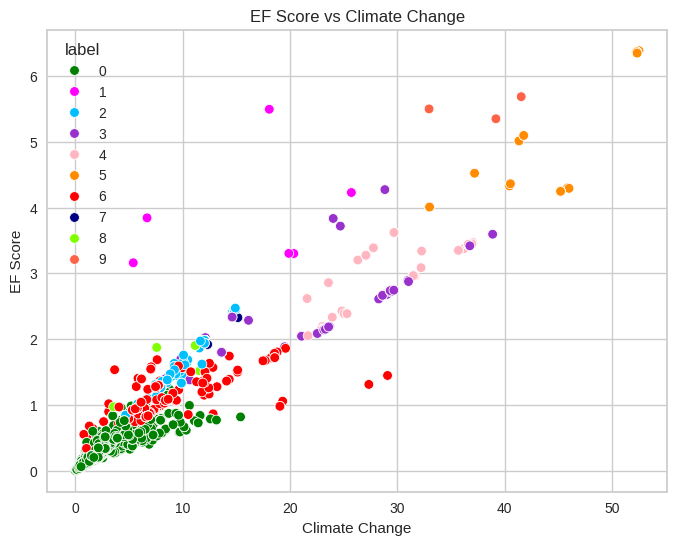

/tmp/ipykernel_3596703/2358299720.py:6: UserWarning: The palette list has more values (15) than needed (10), which may not be intended.
  ax = sns.scatterplot(df_o, x=col, y='EF Score', hue='label', legend=True, palette=palette)


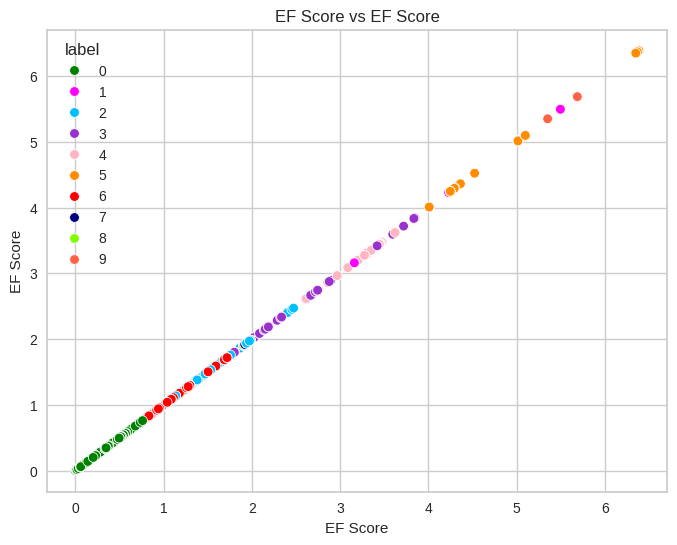

In [217]:

for col in cols :
    # Create figure and adjust size
    plt.figure(figsize=(8,6))

    # Create count plot
    ax = sns.scatterplot(df_o, x=col, y='EF Score', hue='label', legend=True, palette=palette)

    # Add title
    ax.set_title(f'EF Score vs {col}')

    # Add axis labels
    ax.set_xlabel(col)
    ax.set_ylabel('EF Score')

    # Show plot
    plt.show()


---

<center>
    
## Results

</center>

---

### What kind of produce are found in the Highest Environmental Footprint Categorie (9-6)?

In [276]:
extreme = df_o[df_o['label'].isin([9,6])]

print(len(high))

extreme[['LCI Name', 'Food Sub-group','Delivery','Airplane Code', 'Preparation']]

37


LCI Name  \
1804                            Lamb on skewer   
1883     Merguez sausage, beef and mutton, raw   
1884  Merguez sausage, beef and mutton, cooked   
1972                       Norway lobster, raw   
1980              Crab, boiled/cooked in water   
1982           Lobster, boiled/cooked in water   
2211                           Lamb, neck, raw   
2212                    Lamb, chop fillet, raw   
2213                       Lamb, rib chop, raw   
2214                         Lamb, cutlet, raw   
2215                       Lamb, shoulder, raw   
2216                 Lamb, shoulder, lean, raw   
2217                            Lamb, leg, raw   
2218                         Lamb, saddle, raw   
2248                           Young goat, raw   
2277                     Mutton, shoulder, raw   
2278                          Mutton, leg, raw   
2281                         Mutton, meat, raw   
2346             Lamb, neck, braised or boiled   
2347      Lamb, chop fillet, grilled/pan-fried   
2348         Lamb, rib chop, grilled/pan-fried   
2349                      Lamb cutlet, grilled   
2350       Lamb, shoulder, lean, roasted/baked   
2351             Lamb, shoulder, roasted/baked   
2352                        Lamb, leg, braised   
2353              Lamb, leg, grilled/pan-fried   
2354                  Lamb, leg, roasted/baked   
2355           Lamb, saddle, grilled/pan-fried   
2356         Lamb, saddle, lean, roasted/baked   
2362                       Beef, neck, braised   
2371            Beef, chuck, braised or boiled   
2376       Beef, minced steak, 10% fat, cooked   
2377       Beef, minced steak, 15% fat, cooked   
2378       Beef, minced steak, 20% fat, cooked   
2379        Beef, minced steak, 5% fat, cooked   
2391                        Young goat, cooked   
2433                  Sweetbread, lamb, cooked   

                        Food Sub-group Delivery  Airplane Code  \
1804  autres produits à base de viande    Glacé              0   
1883                      charcuteries    Glacé              0   
1884                      charcuteries    Glacé              0   
1972      mollusques et crustacés crus    Glacé              0   
1980     mollusques et crustacés cuits    Glacé              0   
1982     mollusques et crustacés cuits    Glacé              0   
2211                     viandes crues    Glacé              0   
2212                     viandes crues    Glacé              0   
2213                     viandes crues    Glacé              0   
2214                     viandes crues    Glacé              0   
2215                     viandes crues    Glacé              0   
2216                     viandes crues    Glacé              0   
2217                     viandes crues    Glacé              0   
2218                     viandes crues    Glacé              0   
2248                     viandes crues    Glacé              0   
2277                     viandes crues    Glacé              0   
2278                     viandes crues    Glacé              0   
2281                     viandes crues    Glacé              0   
2346                    viandes cuites    Glacé              0   
2347                    viandes cuites    Glacé              0   
2348                    viandes cuites    Glacé              0   
2349                    viandes cuites    Glacé              0   
2350                    viandes cuites    Glacé              0   
2351                    viandes cuites    Glacé              0   
2352                    viandes cuites    Glacé              0   
2353                    viandes cuites    Glacé              0   
2354                    viandes cuites    Glacé              0   
2355                    viandes cuites    Glacé              0   
2356                    viandes cuites    Glacé              0   
2362                    viandes cuites    Glacé              0   
2371                    viandes cuites    Glacé              0   
2376                    v

### What kind of produce are found in the Highest Environmental Footprint Categorie (3,0)?

In [278]:
high = df_o[df_o['label'].isin([3,0])]

print(len(high))
pd.set_option('display.max_rows', None) 
high[['LCI Name', 'Food Sub-group','Delivery','Airplane Code', 'Preparation']]

144


LCI Name  \
278                                      Coffee, ground   
354                            Beef samosas or samoosas   
403                            Veal stew in white sauce   
406                              Beef stew with carrots   
407                            Burgundy-style beef stew   
454                                            Moussaka   
455   Stewed lamb garnished with potatoes and other ...   
474                        Veal olive or veal paupiette   
475                      Veal paupiette, cooked in oven   
512                                       Mutton tagine   
519                                    Caen-style tripe   
520                         Caen-style tripe, prepacked   
521                  Provencal-type tripe (with tomato)   
1297                             Tiramisu, refrigerated   
1347                                       Hazelnut oil   
1803                           Beef, meat balls, cooked   
1805                                     Beef on skewer   
1815                       Veal, bread escalope, cooked   
1827                                           Bresaola   
1828                         Duck breast fillet, smoked   
1844                                              Coppa   
1851                  Block duck foie gras, pasteurized   
1852                  Whole duck foie gras, pasteurized   
1856                                     Cured ham, raw   
1857                             Cured ham, raw, smoked   
1858                Cured ham, raw, smoked, reduced fat   
1869                     Bayonne Cured ham, raw, smoked   
1874                                      Dry-cured ham   
1875                                Parma dry-cured ham   
1876                              Serrano dry-cured ham   
1877                Dry-cured ham, fat and rind removed   
1885        Merguez sausage, beef, mutton and pork, raw   
1886                               Merguez sausage, raw   
1887                Merguez sausage, pork and beef, raw   
1888                    Merguez sausage, pure beef, raw   
1896                  Ox muzzle in salad dressing sauce   
1899                                    Pancetta, dried   
1966                        deep water pink shrimp, raw   
1967                               Shrimp or prawn, raw   
1968                                Shrimp, frozen, raw   
1981                            Shrimp or prawn, cooked   
1991                                  Egg white, powder   
2064                                   Arctic char, raw   
2068                                European perch, raw   
2128                          Pangasius, filets, cooked   
2129                      European perch, roasted/baked   
2219                            Beef, stewing meat, raw   
2220                             Beef, flank steak, raw   
2221                             Beef, bolar-blade, raw   
2222                                     Beef, rib, raw   
2223                               Beef, rib steak, raw   
2224                                Beef, shoulder, raw   
2225                           Beef, sirloin steak, raw   
2226                                   Beef, round, raw   
2227                              Beef, thin flank, raw   
2228                                 Beef, knuckle, raw   
2229                                   Beef, cheek, raw   
2230                            Beef, hanger steak, raw   
2231                                   Beef, chuck, raw   
2232                              Beef, short ribs, raw   
2233                              Beef, rump steak, raw   
2234                   Beef, minced steak, 10% fat, raw   
2235                   Beef, minced steak, 15% fat, raw   
2236                   Beef, minced steak, 20% fat, raw   
2237                    Beef, minced steak, 5% fat, raw   
2238                     Beef, steak or beef steak, raw   
2239                                 Beef, topside, raw   
2241                               

### Is there product with delivery 'glacé' in category with moderate and low Environmental footprint category? 

In [286]:
mod_low = df_o[~df_o['label'].isin([6,9,3,0])]

print(len(mod_low))
pd.set_option('display.max_rows', None) 
mod_low[(mod_low['Delivery'] == 'Glacé') & ((mod_low['Food Sub-group'] == 'viandes cuites') | (mod_low['Food Sub-group'] == 'viandes crues'))]

2270


Food Group  Food Sub-group  \
2240  viandes, œufs, poissons   viandes crues   
2242  viandes, œufs, poissons   viandes crues   
2243  viandes, œufs, poissons   viandes crues   
2245  viandes, œufs, poissons   viandes crues   
2247  viandes, œufs, poissons   viandes crues   
2251  viandes, œufs, poissons   viandes crues   
2252  viandes, œufs, poissons   viandes crues   
2253  viandes, œufs, poissons   viandes crues   
2255  viandes, œufs, poissons   viandes crues   
2256  viandes, œufs, poissons   viandes crues   
2257  viandes, œufs, poissons   viandes crues   
2258  viandes, œufs, poissons   viandes crues   
2259  viandes, œufs, poissons   viandes crues   
2260  viandes, œufs, poissons   viandes crues   
2263  viandes, œufs, poissons   viandes crues   
2265  viandes, œufs, poissons   viandes crues   
2266  viandes, œufs, poissons   viandes crues   
2267  viandes, œufs, poissons   viandes crues   
2268  viandes, œufs, poissons   viandes crues   
2270  viandes, œufs, poissons   viandes crues   
2271  viandes, œufs, poissons   viandes crues   
2273  viandes, œufs, poissons   viandes crues   
2275  viandes, œufs, poissons   viandes crues   
2276  viandes, œufs, poissons   viandes crues   
2282  viandes, œufs, poissons   viandes crues   
2283  viandes, œufs, poissons   viandes crues   
2284  viandes, œufs, poissons   viandes crues   
2285  viandes, œufs, poissons   viandes crues   
2286  viandes, œufs, poissons   viandes crues   
2287  viandes, œufs, poissons   viandes crues   
2288  viandes, œufs, poissons   viandes crues   
2289  viandes, œufs, poissons   viandes crues   
2290  viandes, œufs, poissons   viandes crues   
2291  viandes, œufs, poissons   viandes crues   
2292  viandes, œufs, poissons   viandes crues   
2293  viandes, œufs, poissons   viandes crues   
2294  viandes, œufs, poissons   viandes crues   
2295  viandes, œufs, poissons   viandes crues   
2296  viandes, œufs, poissons   viandes crues   
2297  viandes, œufs, poissons   viandes crues   
2298  viandes, œufs, poissons   viandes crues   
2299  viandes, œufs, poissons   viandes crues   
2300  viandes, œufs, poissons   viandes crues   
2301  viandes, œufs, poissons   viandes crues   
2302  viandes, œufs, poissons   viandes crues   
2303  viandes, œufs, poissons   viandes crues   
2304  viandes, œufs, poissons   viandes crues   
2305  viandes, œufs, poissons   viandes crues   
2306  viandes, œufs, poissons   viandes crues   
2307  viandes, œufs, poissons   viandes crues   
2308  viandes, œufs, poissons   viandes crues   
2309  viandes, œufs, poissons   viandes crues   
2310  viandes, œufs, poissons   viandes crues   
2311  viandes, œufs, poissons   viandes crues   
2312  viandes, œufs, poissons   viandes crues   
2313  viandes, œufs, poissons   viandes crues   
2314  viandes, œufs, poissons   viandes crues   
2315  viandes, œufs, poissons   viandes crues   
2316  viandes, œufs, poissons   viandes crues   
2317  viandes, œufs, poissons   viandes crues   
2318  viandes, œufs, poissons   viandes crues   
2319  viandes, œufs, poissons   viandes crues   
2320  viandes, œufs, poissons   viandes crues   
2321  viandes, œufs, poissons   viandes crues   
2322  viandes, œufs, poissons   viandes crues   
2323  viandes, œufs, poissons   viandes crues   
2324  viandes, œufs, poissons   viandes crues   
2329  viandes, œufs, poissons   viandes crues   
2333  viandes, œufs, poissons   viandes crues   
2336  viandes, œufs, poissons   viandes crues   
2342  viandes, œufs, poissons   viandes crues   
2383  viandes, œufs, poissons  viandes cuites   
2385  viandes, œufs, poissons  viandes cuites   
2386  viandes, œufs, poissons  viandes cuites   
2388  viandes, œufs, poissons  viandes cuites   
2390  viandes, œufs, poissons  viandes cuites   
2394  viandes, œufs, poissons  viandes cuites   
2395  viandes, œufs, poissons  viandes cuites   
2396  viandes, œufs, poissons  viandes cuites   
2397  viandes, œufs, poissons  viandes cuites   
2398  viandes, œufs, poissons  viandes cuites   
2

### Can I still eat meat while trying to minimize my Environmental Footprint?

In [293]:
df_o.groupby(['label','Food Group'])[['LCI Name']].count()

LCI Name
label Food Group                                           
0     boissons                                            1
      entrées et plats composés                          12
      lait et produits laitiers                           1
      matières grasses                                    1
      viandes, œufs, poissons                           121
1     aides culinaires et ingrédients divers             65
      aliments infantiles                                 8
      boissons                                            5
      entrées et plats composés                         179
      fruits, légumes, légumineuses et oléagineux        96
      glaces et sorbets                                  11
      lait et produits laitiers                         139
      matières grasses                                   47
      produits céréaliers                               214
      produits sucrés                                    38
      viandes, œufs, poissons                           137
2     entrées et plats composés                          18
      viandes, œufs, poissons                           107
3     viandes, œufs, poissons                             8
4     aides culinaires et ingrédients divers             74
      aliments infantiles                                30
      boissons                                          131
      entrées et plats composés                          85
      fruits, légumes, légumineuses et oléagineux       314
      glaces et sorbets                                  14
      lait et produits laitiers                          81
      matières grasses                                    4
      produits céréaliers                               159
      produits sucrés                                    13
      viandes, œufs, poissons                            20
5     aides culinaires et ingrédients divers              1
      boissons                                            1
      entrées et plats composés                          15
      fruits, légumes, légumineuses et oléagineux        13
      lait et produits laitiers                           2
      matières grasses                                    6
      produits céréaliers                                 2
      produits sucrés                                     2
      viandes, œufs, poissons                           207
6     viandes, œufs, poissons                            34
7     viandes, œufs, poissons                            11
8     aides culinaires et ingrédients divers             17
      boissons                                            1
      fruits, légumes, légumineuses et oléagineux         3
9     viandes, œufs, poissons                             3

In [300]:
tmp = df_o.groupby(['label','Food Group'])[['LCI Name']].count().reset_index()

tmp[tmp['Food Group'] == 'viandes, œufs, poissons'].sort_values(by='LCI Name')

label               Food Group  LCI Name
44      9  viandes, œufs, poissons         3
18      3  viandes, œufs, poissons         8
40      7  viandes, œufs, poissons        11
29      4  viandes, œufs, poissons        20
39      6  viandes, œufs, poissons        34
17      2  viandes, œufs, poissons       107
4       0  viandes, œufs, poissons       121
15      1  viandes, œufs, poissons       137
38      5  viandes, œufs, poissons       207

### Can I still buy prepared food for a lazy night or a quick meal while minimizing my Environmental Footprint?

In [302]:
tmp = df_o.groupby(['label','Food Sub-group'])[['LCI Name']].count().reset_index()

tmp[tmp['Food Sub-group'] == 'plats composés'].sort_values(by='LCI Name')


label  Food Sub-group  LCI Name
136      5  plats composés        10
5        0  plats composés        11
64       2  plats composés        13
107      4  plats composés        30
42       1  plats composés        58

In [303]:
tmp = df_o.groupby(['label','Food Group'])[['LCI Name']].count().reset_index()

tmp[tmp['Food Group'] == 'entrées et plats composés'].sort_values(by='LCI Name')

label                 Food Group  LCI Name
1       0  entrées et plats composés        12
32      5  entrées et plats composés        15
16      2  entrées et plats composés        18
22      4  entrées et plats composés        85
8       1  entrées et plats composés       179

---

<center>
    
## Conclusion

</center>

---